In [ ]:
# Feb 09 2022: 
# 1. changed data dir, so that notebook runs with the repo's folder structure
# 2. changed plot dir, so that plots saved to folder in repo, also commented all plots not included in paper

In [1]:
# Analysis of staining artefacts using the new scoring table, made in 2022
import sys
import importlib
import os

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
import math
import copy
import random
import scipy


# sys.path.append('/camp/project/proj-emschaefer/working/yuxin_scripts/Projects/BlastEM/3-database') # to import functions from other dir
# from ipynb.fs.full.BlastEM_myFunctions import sampleIDcheck # import function from anther jupyter notebook

In [2]:
# analysis functions
import BlastEM_myFunctions as mf
importlib.reload(mf) # allows update on module without restarting kernel

# plot settings
import plot_settings as ps
importlib.reload(ps)

<module 'plot_settings' from 'C:\\Users\\zhangy3\\Documents\\repos\\blastEM\\1-analysis\\plot_settings.py'>

In [3]:
# plot asterisks
def plotPvalueX(p, ax, x1, x2, y, hFactor):
    '''Plot a horizontal line at given position with asterisk if significant (* if p<0.05; ** if p<0.005, *** if p<0.0005)'''
    lWidth = 0.5
    if p <= 0.05 and p > 0.005:
        ax.plot([x1, x2], [y, y], '-', color = [0, 0, 0], linewidth = lWidth)
        ax.text((x1+x2)/2, hFactor*y, '*', horizontalalignment = 'center')
    elif p <=0.005 and p>0.0005:
        ax.plot([x1, x2], [y, y], '-', color = [0, 0, 0], linewidth = lWidth)
        ax.text((x1+x2)/2, hFactor*y, '* *', horizontalalignment = 'center')
    elif p <=0.0005:
        ax.plot([x1, x2], [y, y], '-', color = [0, 0, 0], linewidth = lWidth)
        ax.text((x1+x2)/2, hFactor*y, '* * *', horizontalalignment = 'center')
    else:
        ax.plot([x1, x2], [y, y], '-', color = [0, 0, 0], linewidth = lWidth)
        ax.text((x1+x2)/2, hFactor*y, 'n.s.', horizontalalignment = 'center')
        

In [4]:
# plot parameters
ps.samplePrepPaper() # when wanting to save fig

# note: max. width for A4 paper is 13inches, so max plotWx3

plotW = 4
plotH = 4
barWidth = 0.5
dotSize_small = 3

color_slab1 = '#EDB120' # ? yellow
color_slab2 = '#6495ED' # corn flour blue

color_group = '#778899' # light slate gray, use for e.g. 'x % of group Y contains Z'

color_PallottoHT = '#5F9EA0' # cadet blue
color_Pallotto = '#4682B4' # steel blue
color_HuaImm = '#483D8B' # dark slate blue

color_crack = np.array([8,48,107])/255 # the last color in Blues colormap # '#5E99C5' # steel blue 2
color_crack1 = '#F5F5F5'# white smoke
color_crack2 = '#B0C4DE' # light steel blue
color_crackBoth = '#708090' # slate grey

#color_crack = '#B0C4DE' # light steel blue
#color_crack1 = '#6495ED' # cornflour blue
#color_crack2 = '#5E99C5' # steel blue
#color_pie3 = [np.array([100,149,237])/255, np.array([70,130,180])/255, np.array([65,105,225])/255] # crack I, crack II, both (royal blue) 

color_patchy = '#8B4513' # saddle brown
color_smoky = '#CD853F' # peru
color_undefined = '#696969' # dim grey
color_default = np.array([112,128,144])/255 # slate grey '#708090#'

color_sideways = '#FF8C00' # dark orange
color_sideways_clear = '#FF6347' # tomato
color_sideways_fuzzy = '#FFA07A' # light salmon
color_sideways_band = '#FFD700' # gold
color_sideways_unsure = '#DCDCDC' # gainsboro
color_sideways_simple = '#F08080' # light coral
color_sideways_compound = '#CD5C5C' # indian red


color_pie = [np.array([112,128,144])/255, np.array([245,245,245])/255] # default, white smoke
color_pie2 = [np.array([245,245,245])/255, np.array([112,128,144])/255, np.array([176,196,222])/255, np.array([230,230,250])/255] # white smoke, light steel blue, slate grey, lavender
color_pie3 = [np.array([245,245,245])/255, np.array([176,196,222])/255, np.array([112,128,144])/255] # white smoke, slate grey, light steel blue


color_pie_label = [0, 0, 0]


alpha_individual = 0.3
alpha_avg = 1

boxAsepct_2groups = 1.2 # y:x
boxAsepct_3groups = 1

font_default = 8
font_busyLabel = 6
font_legend = 4
font_pie = 6

lineWidth_legend = 0.5

margin_2groups = 0.3
margin_3groups = 0.3

#colorCy = ['red', 'saddlebrown', 'chocolate', 'darkorange', 'goldenrod', 'olive', 'forestgreen', 'teal', 'dodgerblue', 'slateblue', 'darkviolet', 'orchid', 'black']
#colorCy = ['firebrick', 'saddlebrown', 'chocolate', 'darkorange', 'goldenrod', 'olive', 'forestgreen', 'teal', 'dodgerblue', 'slateblue', 'darkviolet', 'orchid', 'dimgray']
#colorP = [[230, 25, 75, 255], [60, 180, 75, 255], [0, 130, 200, 255], [245, 130, 48, 255], \
          #[145, 30, 180, 255], [7, 240, 240, 255], [240, 50, 230, 255], [210, 245, 60, 255], [250, 190, 190, 255], \
          #[0, 128, 128, 255], [230, 190, 255, 255], [170, 110, 40, 255], [128, 0, 0, 255], [170, 255, 195, 255]]
#colorP = np.array(colorP)/255
# why reloading .py no tworking?
#plt.rcParams['axes.prop_cycle'] = mpl.cycler(color= ['blue', 'green', 'red', 'cyan', 'magenta', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold']) 

#mpl.rcdefaults() # to restor to default settings

# utilities
# ax.plot(jx, value[1], '.', color = color_sideways, clip_on = False) # to avoid axis clipping dots


In [5]:
# Plot fonts
# 1. check fonts available
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.font_manager.findSystemFonts()

# 2. Import more fonts
mpl.rcParams['font.family'] = 'Trebuchet MS'

In [14]:
# load data sheets
#projectDir = '/camp/project/proj-emschaefer/working/yuxin_scripts/Projects/BlastEM'
#dataDir = os.path.join(projectDir, '3-database/v2022/1-processed')
analysisDir = os.getcwd()
repoDir = os.path.dirname(analysisDir)
dataDir = os.path.join(repoDir, '0-data')
plotDir = os.path.join(repoDir, '2-plots')

display(os.listdir(dataDir))

scoreInfo = pd.read_excel(os.path.join(dataDir, 'staining_artefact_scoring_new_v220129.xlsx'), index_col = 0) # if want to omit notes: , usecols = np.arange(0, 12)
sidewaysSubdiv = pd.read_excel(os.path.join(dataDir, 'staining_artefact_scoring_new_subdivisions_sideways_v220113.xlsx'), index_col = 0)
crackSubdiv = pd.read_excel(os.path.join(dataDir, 'staining_artefact_scoring_new_subdivisions_crack_v220117.xlsx'), index_col = 0, usecols = np.arange(0, 4)) # ignore notes column
crackNotes = pd.read_excel(os.path.join(dataDir, 'staining_artefact_scoring_new_subdivisions_crack_v220117.xlsx'), index_col = 0, usecols = [0,4]) # read only notes column
batchInfo = pd.read_excel(os.path.join(dataDir, 'staining_batch_info_v2.xlsx'), index_col = 0, keep_default_na=False)
batchInfo['date'] = [batchInfo['batch'][i][-6:] for i, _ in enumerate(batchInfo.index)] # add Date column to batch info
sampleInfo = pd.read_excel(os.path.join(dataDir, 'staining_sample_info_yesCT_v2.xlsx'), index_col = 0)

sampleVolume = pd.read_csv(os.path.join(dataDir, 'result_sample_volume_noCrack_v1.csv'), index_col = 0)
EM2Pratio = pd.read_csv(os.path.join(dataDir, 'EM_2P_distRatio_top400.csv'))


['EM_2P_distRatio_top400.csv',
 'result_sample_volume_noCrack_v1.csv',
 'staining_artefact_scoring_new_subdivisions_crack_v220117.xlsx',
 'staining_artefact_scoring_new_subdivisions_sideways_v220113.xlsx',
 'staining_artefact_scoring_new_v220129.xlsx',
 'staining_batch_info_v2.xlsx',
 'staining_sample_info_yesCT_v2.xlsx']

In [15]:
# Data health clinic
# note: if all good, should expect empty lists
# 1. check for discrepencies in scoring for sideways
a = sidewaysSubdiv.index[(sidewaysSubdiv.sum(axis = 1) > 0)]
b = scoreInfo.index[(scoreInfo['sideways'] == 1)]
if [x for x in set(a) if x not in set(b)] == [] and [x for x in set(b) if x not in set(a)] == []:
    print('GOOD: sideways arte scoring matches subdivision scoring')
else:
    print('!!!: sideways score & subdivision do not match')

# 2. check for discrepencies in scoring for crack
a = crackSubdiv.index[(crackSubdiv.sum(axis = 1, numeric_only=True) > 0)]
b = scoreInfo.index[(scoreInfo['crack'] == 1)]
if [x for x in set(a) if x not in set(b)] == [] and [x for x in set(b) if x not in set(a)] == []:
    print('GOOD: crack arte scoring matches subdivision scoring')
else:
    print('!!!: crack score & subdivision do not match')

# 3. check sample IDs match
a = sampleInfo.index
b = scoreInfo.index
if [x for x in set(a) if x not in set(b)] == []:
    print('GOOD: all scored samples included in sampleInfo')

# 4. check group IDs match
a = set(sampleInfo['group'])
b = set(batchInfo.index)
if [x for x in set(a) if x not in set(b)] == [] and [x for x in set(b) if x not in set(a)] == []:
    print('GOOD: same group found in sampleInfo and groupInfo')

# 5. check if any artefact scoring value is nan
for i in scoreInfo.columns[:-1]:
    if scoreInfo[i].isnull().values.any():
        print(scoreInfo.loc[pd.isna(scoreInfo[i]), :].index)

# 6. check all crack II samples have notes about position
idxII = crackSubdiv.index[crackSubdiv['type II'] == 1]
idxNA = crackSubdiv.index[crackSubdiv['type II notes'].isna()]
l = set(idxII) & set(idxNA)
if len(l) == 0:
    print('GOOD: all crackII samples have position notes')
else:
    print(f'!!! {l} do not have crackII notes')


GOOD: sideways arte scoring matches subdivision scoring
GOOD: crack arte scoring matches subdivision scoring
GOOD: all scored samples included in sampleInfo
GOOD: same group found in sampleInfo and groupInfo
GOOD: all crackII samples have position notes


In [16]:
# Data cleaning: keep only OB samples
# 1) concatenating all information together
allInfo = pd.concat([scoreInfo, mf.makeTable(sampleInfo, batchInfo, scoreInfo.index)], axis = 1)

# 2) get OB sample ID
kpOB, drpOB = mf.get_sampleID_by_filter(allInfo, {'tissue': 'OB'})

# 3) Keep only OB samples in all datasheet imported
allInfo.drop(index = drpOB, inplace=True)
scoreInfo.drop(index = drpOB, inplace=True)
sidewaysSubdiv.drop(index = drpOB, inplace=True)
crackSubdiv.drop(index = drpOB, inplace=True)
crackNotes.drop(index = drpOB, inplace=True)
sampleInfo.drop(index = drpOB, inplace=True)
sampleVolume = sampleVolume.loc[[i for i in sampleVolume.index if i not in drpOB]]
EM2Pratio = EM2Pratio[[i for i in EM2Pratio.columns if i not in drpOB]]

# TO DO: keep index order! Done?

Using all sample features by default.
Using all batch features by default.


In [17]:
# Numerical - all kinds of counting
sum(allInfo['slab_idx'] == 'L1') + sum(allInfo['slab_idx'] == 'R1')
sum(allInfo['slab_idx'] == 'L2') + sum(allInfo['slab_idx'] == 'R2')
sum(allInfo['slab_idx'] == 'L3') + sum(allInfo['slab_idx'] == 'R3')
sum(allInfo['slab_idx'] == 'L4') + sum(allInfo['slab_idx'] == 'R4')
sum(allInfo['slab_idx'] == 'LD') + sum(allInfo['slab_idx'] == 'LV') + sum(allInfo['slab_idx'] == 'RD') + sum(allInfo['slab_idx'] == 'RV')
sum(allInfo['slab_idx'] == 'Lfull') + sum(allInfo['slab_idx'] == 'Rfull')
print(allInfo['stain_name'].unique())
sum(allInfo['stain_name'] == 'Pallotto+halfTime')
sum(allInfo['stain_name'] == 'Pallotto')
sum(allInfo['2P_inVivo'] == 0)

['Pallotto+halfTime' 'Pallotto' 'Pallotto:Hua' 'Hua+NaOH' 'Hua'
 'Hua+newPb' 'Hua+newOs' 'Hua-O' 'Hua-OR' 'Hua-ORT' 'Hua-ORTO' 'Hua-ORTOU'
 'Hua-ORTOUL']


387

In [19]:
sum(allInfo['2P_inVivo'] == 1)

40

In [20]:
# Data re-slicing & summary
# 1. table: sampleID by [number of artefacts]
arteCount = pd.DataFrame({'no. of arte': scoreInfo.sum(axis = 1)}, index = scoreInfo.index)

# 2. table: batchID by [the number of samples with no, 1, 2, 3 artefact; total number of samples]
arteNoMin = int(min(arteCount['no. of arte']))
arteNoMax = int(max(arteCount['no. of arte']))

arteCount_byGroup = np.zeros((len(batchInfo.index), arteNoMax+1))
for idx, i in enumerate(batchInfo.index):
    sampleID = sampleInfo.index[sampleInfo['group'] == i]
    s = arteCount['no. of arte'][arteCount.index.isin(sampleID)]
    
    for j in np.arange(arteNoMax+1):
        arteCount_byGroup[idx, j] = sum(s == j)
        
arteCount_byGroup = pd.DataFrame(arteCount_byGroup, columns = ['perfect', '1 arte', '2arte', '3 arte'], index = batchInfo.index)
arteCount_byGroup['total n'] = arteCount_byGroup.sum(axis = 1)

# 3. data series: total number of samples containing each artefact
sampleN = len(sampleInfo.index)
occurrence_byArtefact = scoreInfo.sum(axis = 0)

# 4.table: group ID by % artefact type; % of samples affected by an artefact in each group
groupList = allInfo['group'].unique()
groupN = len(groupList)
arteN = len(scoreInfo.columns)

artePer_byGroup = np.zeros((groupN, arteN))

for idxi, i in enumerate(groupList):
    sampleIdx = allInfo['group'] == i
    n = sum(sampleIdx)
    
    for idxj, j in enumerate(scoreInfo.columns):
        artePer_byGroup[idxi, idxj] = sum(scoreInfo[j][sampleIdx])/n*100

artePer_byGroup = pd.DataFrame(artePer_byGroup, columns = scoreInfo.columns, index = groupList)
# crack has incomplete data for C samples, drop it
artePer_byGroup_noCrack = artePer_byGroup.drop(columns='crack')

# number of perfect samples
perfectN = sum(scoreInfo.sum(axis = 1) == 0)


In [21]:
# Numerical - artefact co-occurrence
n1 = round(sum(arteCount['no. of arte'] == 1)/sampleN*100)
n2 = round(sum(arteCount['no. of arte'] == 2)/sampleN*100)
n3 = round(sum(arteCount['no. of arte'] == 3)/sampleN*100)
print(f'There are {n1}%, {n2}%, {n3}% of samples with 1, 2, 3 types of artefacts respectively')

# which samples have 3 artefacts
#print(arteCount.index[arteCount['no. of arte'] == 3])


There are 41%, 33%, 7% of samples with 1, 2, 3 types of artefacts respectively


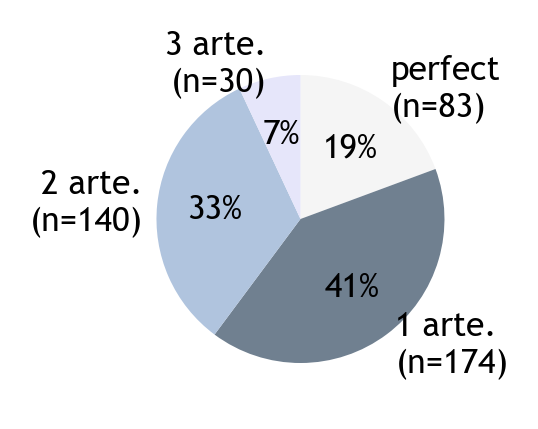

In [23]:
# Plot - artefact co-occurrence
d = [perfectN/sampleN*100, n1, n2, n3]
dn = [perfectN, sum(arteCount['no. of arte'] == 1), sum(arteCount['no. of arte'] == 2),sum(arteCount['no. of arte'] == 3)]
pieLabels = [f'perfect\n(n={dn[0]})', f'1 arte.\n(n={dn[1]})', f'2 arte.\n(n={dn[2]})', f'3 arte.\n(n={dn[3]})']

fig, ax = plt.subplots(1, 1, figsize = [plotW/2, plotH/2])
ax.pie(d, colors = color_pie2, startangle=90, counterclock = False, autopct='%1.0f%%', labels = pieLabels, textprops={'fontsize': font_default});
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'arte_co-occurrence_pie_withN.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'arte_co-occurrence_pie_withN.svg'), bbox_inches = 'tight')

In [25]:
# Plot - artefact occurrence by group
# note: include all batch, all sample, all artefact (for crack: describe sampling in method)

# 0) common data
d = artePer_byGroup.copy()
d['perfect'] = arteCount_byGroup['perfect']/arteCount_byGroup['total n']*100
# move 'perfect' to the 1st column
cols = d.columns.tolist()
cols = cols[-1:] + cols[:-1]
d = d[cols]
arteList = d.columns.tolist()

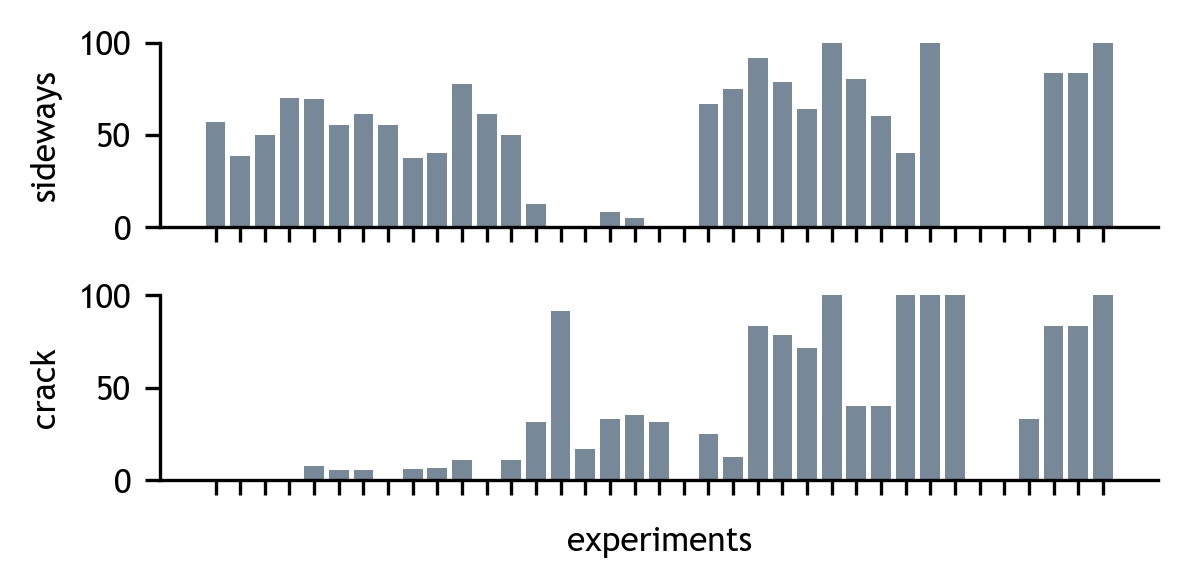

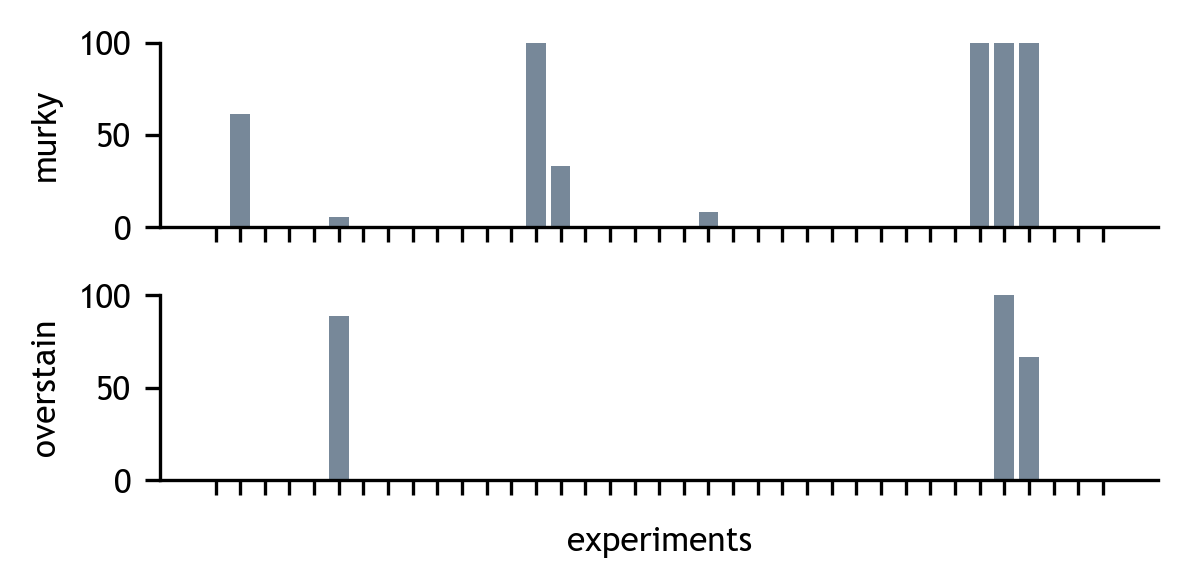

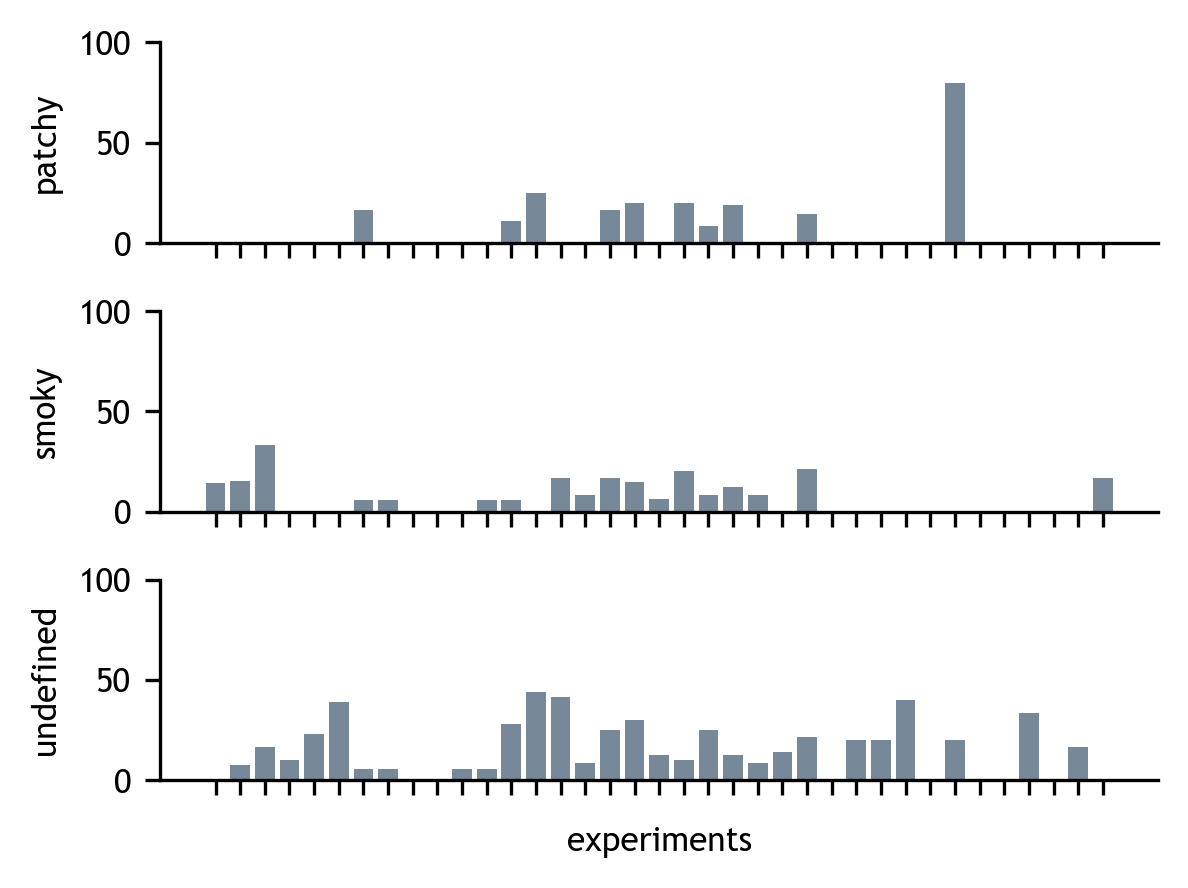

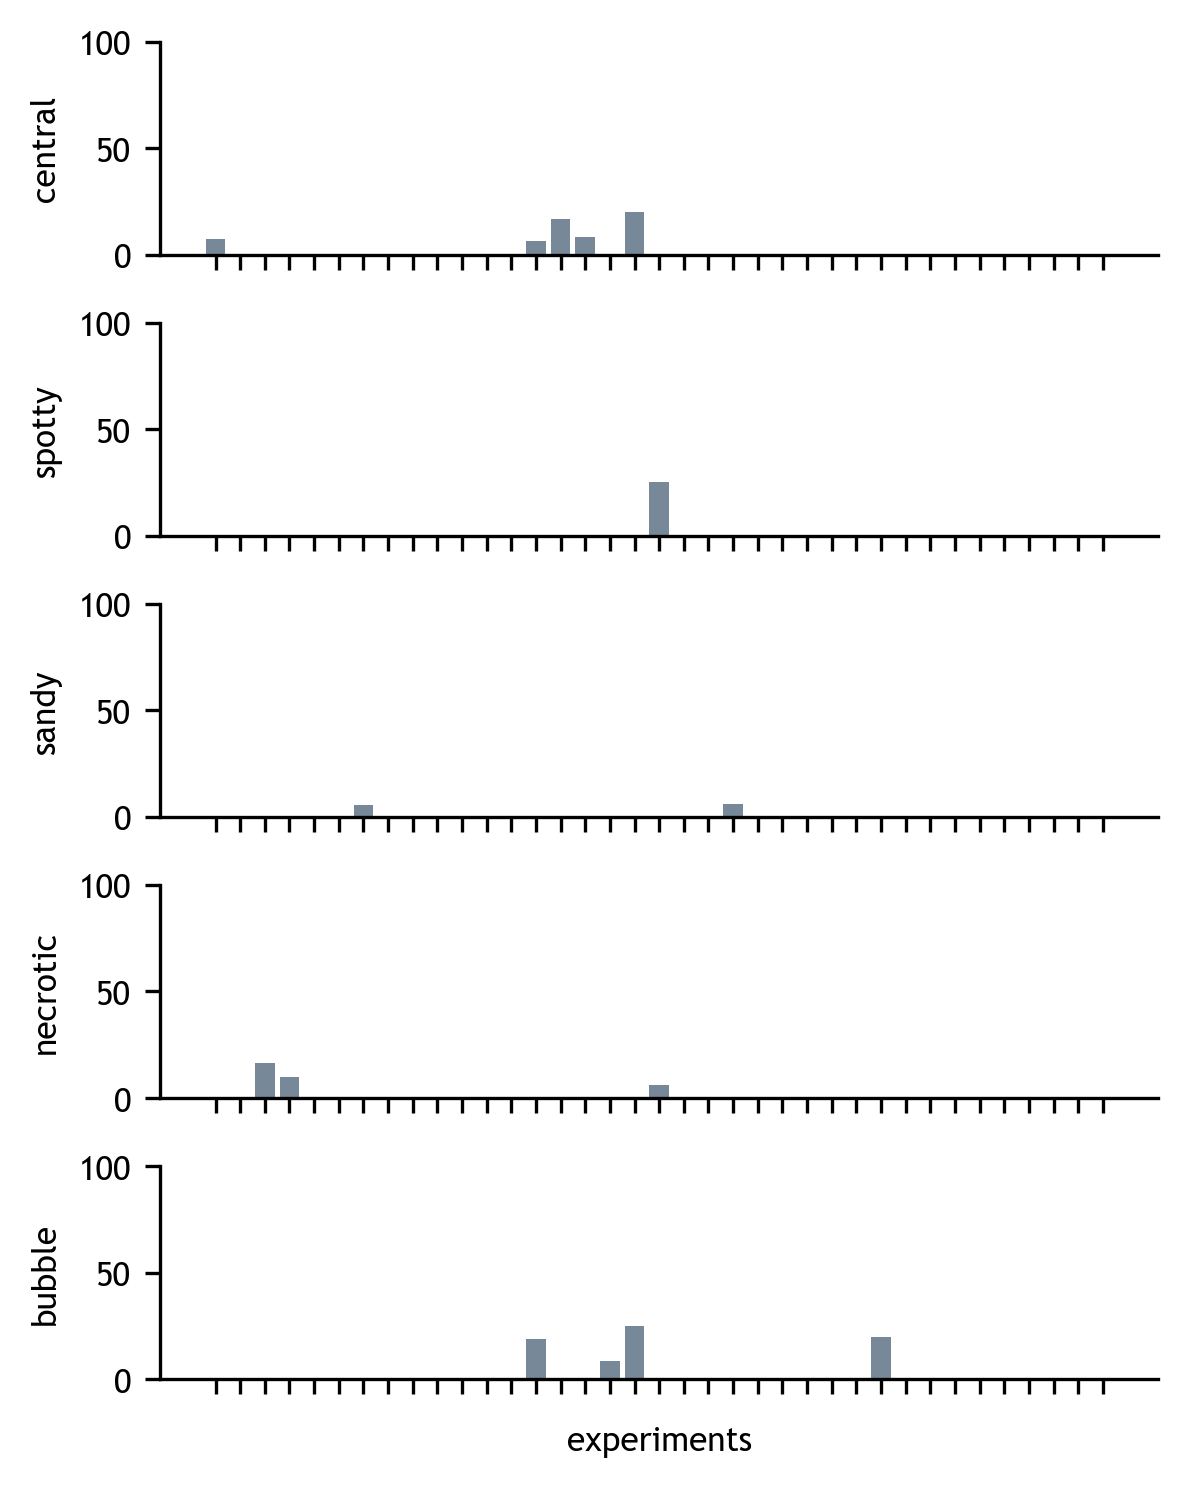

In [26]:
# 1) plot - subplot by artefact type, no x tick labels
arteTypeDict = {'common high': ['sideways', 'crack'], 'common low': ['patchy', 'smoky', 'undefined'],
               'batch specific': ['murky', 'overstain'], 'rare': ['central', 'spotty', 'sandy', 'necrotic', 'bubble']}

# how many members are there
memberN = [2, 3, 5]
arteType = dict()
arteType[memberN[0]] = [i for i in arteTypeDict.keys() if len(arteTypeDict[i]) == 2]
arteType[memberN[1]] = [i for i in arteTypeDict.keys() if len(arteTypeDict[i]) == 3]
arteType[memberN[2]] = [i for i in arteTypeDict.keys() if len(arteTypeDict[i]) == 5]

for n in memberN:
    # for each artefact type
    for typeName in arteType[n]:
        plotN = n
        fig, ax = plt.subplots(plotN, 1, figsize = [plotW, plotH/4*plotN])
        axList = ax.ravel()
        
        # for each artefact within that type
        for idx, i in enumerate(arteTypeDict[typeName]):
            y = d[i]
            cax = axList[idx]
            cax.bar(d.index, y, color = color_group)
            cax.set_ylim([0, 100])
            cax.set_ylabel(f'{i}')
            cax.spines["top"].set_visible(False)
            cax.spines["right"].set_visible(False)
            cax.set_xticks(np.arange(len(d.index)))
            cax.set_xticklabels([])

            if idx == plotN-1:
                cax.set_xlabel('experiments')

        plt.tight_layout()

        plt.savefig(os.path.join(plotDir, f'arte_occurrence_bygroup_subplot_v2_{n}member_{typeName}.png'), bbox_inches = 'tight')
        plt.savefig(os.path.join(plotDir, f'arte_occurrence_bygroup_subplot_v2_{n}member_{typeName}.svg'), bbox_inches = 'tight')
    



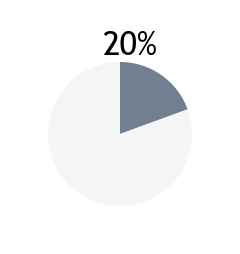

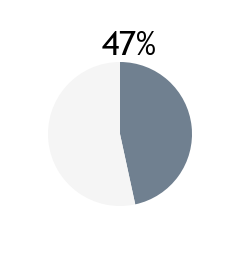

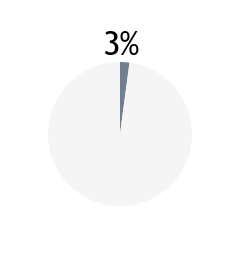

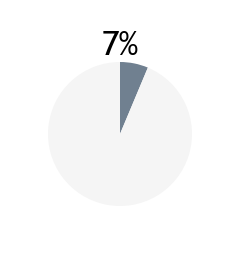

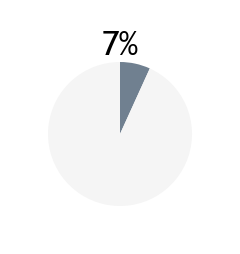

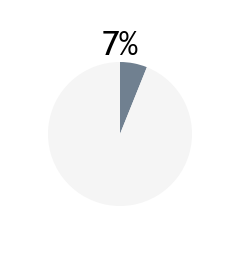

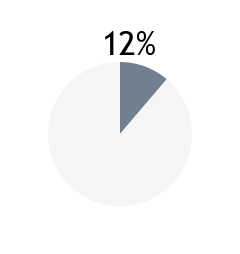

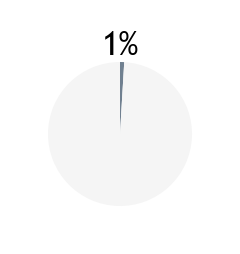

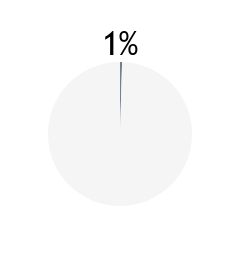

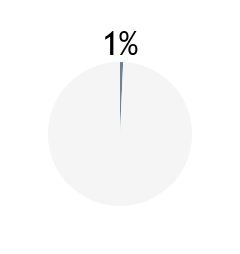

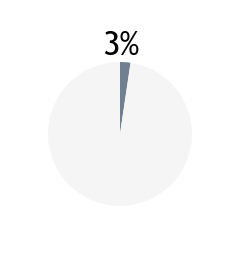

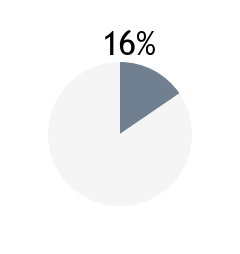

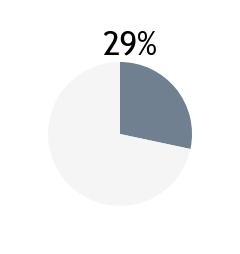

In [27]:
# Plot - artefact occurrence piechart
# note: all batch, all sample, all artefact
# note: x% of samples contain artefact A (do not add up to 100% because of some samples have multiple artefacts)
# note: label is ceil(value) i.e. rounded up, for aesthetic purposes

d = occurrence_byArtefact.append(pd.Series(perfectN, index = ['perfect']))

for idx, i in enumerate(arteList):
    fig, ax = plt.subplots(1, 1, figsize = [plotW/4, plotH/4])
    y = [d.loc[i], sampleN - d.loc[i]]
    ax.pie(y, colors = color_pie, startangle=90, counterclock = False, textprops={'fontsize': font_busyLabel}) #autopct='%1.1f%%',
    t = str(round(np.ceil(y[0]/sum(y)*100)))
    # ax.text(0.05, 0.4, t+'%', fontsize = font_pie, color = color_pie_label) # inside lable
    ax.text(-0.25, 1.1, t+'%', fontsize = font_default, color = color_pie_label)
    plt.savefig(os.path.join(plotDir, f'arte_occurrence_pie_{i}_outsideLabel_largeFont.png'), bbox_inches = 'tight')
    plt.savefig(os.path.join(plotDir, f'arte_occurrence_pie_{i}_outsideLabel_largeFont.svg'), bbox_inches = 'tight')


min. group size is 5.0, max group size is 20.0, average group size is 11.54054054054054


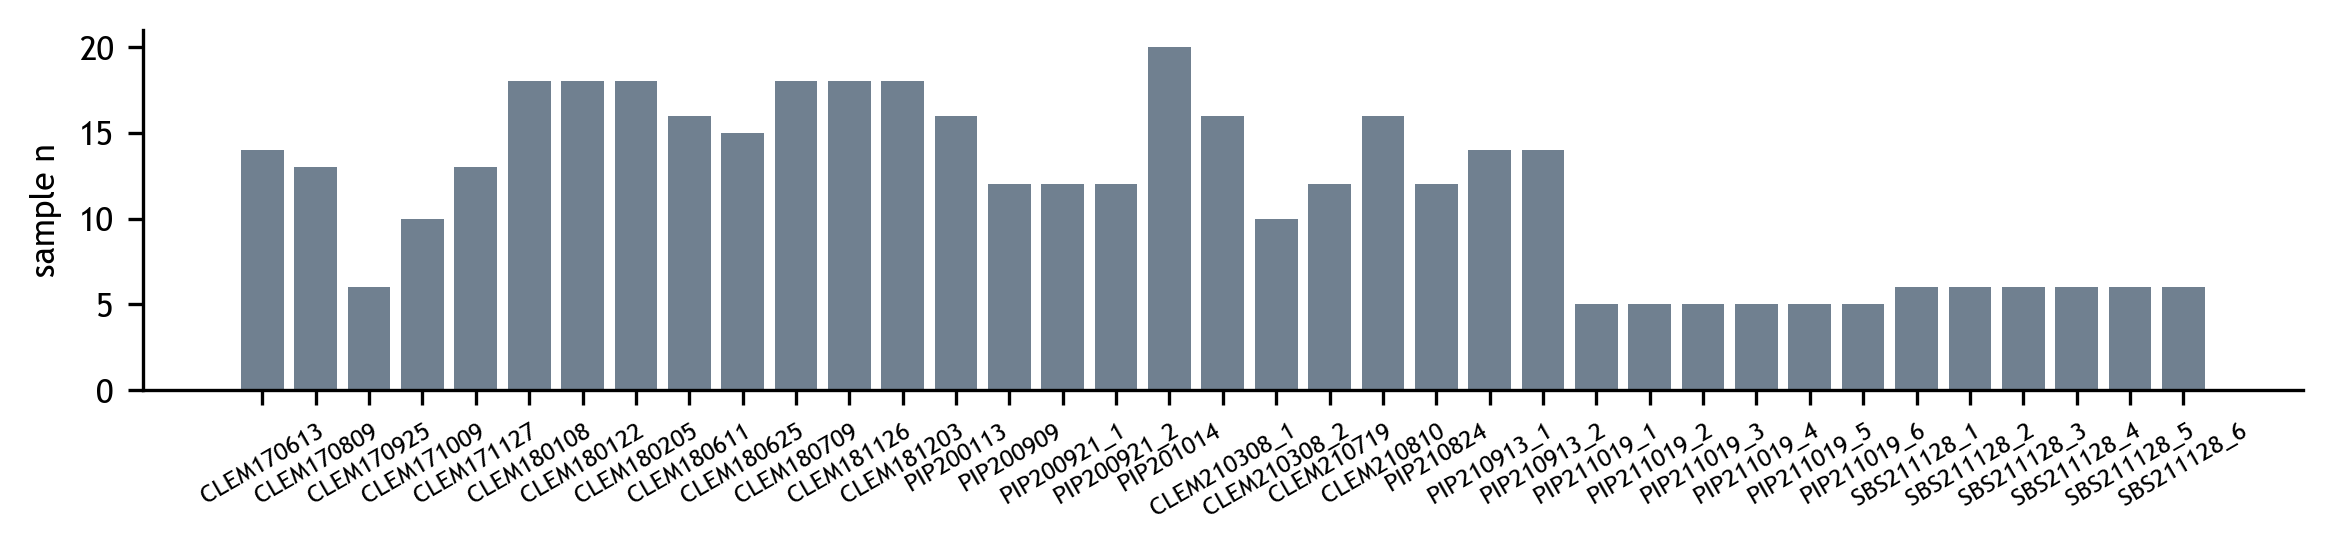

In [28]:
# Plot - sample n by group
fig, ax = plt.subplots(1, 1, figsize = [plotW*3, plotH/2])
ax.bar(groupList, arteCount_byGroup['total n'], color = color_default)
ax.set_xticks(np.arange(len(groupList)))
ax.set_xticklabels(groupList, rotation = 30, fontsize = font_busyLabel)
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_ylabel('sample n')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#plt.savefig('figs/v6/sampleN_by_group.png', bbox_inches = 'tight')
#plt.savefig('figs/v6/sampleN_by_group.svg', bbox_inches = 'tight')

# numerical - min, max, mean of group size
minGroupSize = arteCount_byGroup['total n'].min()
maxGroupSize = arteCount_byGroup['total n'].max()
avgGroupSize = arteCount_byGroup['total n'].mean()
print(f'min. group size is {minGroupSize}, max group size is {maxGroupSize}, average group size is {avgGroupSize}')

In [29]:
# Plot - compare sideways in Pallotto-half time, Pallotto and Hua
# note: for comparability, include only 1st slab OB, 0,6 or 0,65mm, by immersion or perfusion
# note: exclude CLEM180108 (whole bacth abnormal, hard to type) & SBS211128 (not exactly Hua)
# note: for random sample selection, exclude PIP211019 & SBS211128 (they have other dominant artefacts, not suitable for showing sideways clearly)
# note: exclude discard samples

# 0) common data
common_filter = {'tissue':'OB', 'slab_idx': ['L1', 'R1'], 'thickness_mm': [0.6, 0.65]}
Hua_stainNames = list(set(batchInfo['stain_name'][batchInfo['stain_name'].str.startswith('Hua')]))
sampleID_discard_1, _ = mf.get_sampleID_by_filter(allInfo, {'batch': ['CLEM180108', 'SBS211128']})
sampleID_discard_2, _ = mf.get_sampleID_by_filter(allInfo, {'discard': 1})
sampleID_discard = sampleID_discard_1.union(sampleID_discard_2)
randomSampling_discard, _ = mf.get_sampleID_by_filter(allInfo, {'batch': ['PIP211019', 'SBS211128']})

sampleID_PallottoHT, _ = mf.get_sampleID_by_filter(allInfo, dict({'stain_name': 'Pallotto+halfTime'}, **common_filter))
sampleID_Pallotto, _ = mf.get_sampleID_by_filter(allInfo, dict({'stain_name': 'Pallotto'}, **common_filter))
sampleID_Hua_1, _ = mf.get_sampleID_by_filter(allInfo, dict({'stain_name': Hua_stainNames}, **common_filter))

sampleID_PallottoHT = [i for i in sampleID_PallottoHT if i not in sampleID_discard]
sampleID_Pallotto = [i for i in sampleID_Pallotto if i not in sampleID_discard]
sampleID_Hua_1 = [i for i in sampleID_Hua_1 if i not in sampleID_discard]
sampleID_Hua_2 = [i for i in sampleID_Hua_1 if i not in randomSampling_discard]

# by boundary type
#groupDict = {'PallottoHT': sampleID_PallottoHT, 'Pallotto': sampleID_Pallotto, 'HuaImm': sampleID_Hua_1}
groupDict = {'1sRO_halft': sampleID_PallottoHT, '1sRO': sampleID_Pallotto, '2sRO': sampleID_Hua_1}
d = np.zeros((3, len(sidewaysSubdiv.columns)))
for i, boundaryType in enumerate(sidewaysSubdiv.columns):
    for j, sampleID_group in enumerate(groupDict.values()):
        d[j, i] = sum(sidewaysSubdiv[boundaryType][sidewaysSubdiv.index.isin(sampleID_group) > 0]) # count how many samples in this group have this type of sideways

d = pd.DataFrame(d, columns = sidewaysSubdiv.columns, index = groupDict.keys())
d['sideways n'] = [sum(scoreInfo['sideways'][scoreInfo.index.isin(value)] == 1) for value in groupDict.values()]
d['total n'] = [len(value) for value in groupDict.values()]

# by compound/ simple
max_no_sideways = max(sidewaysSubdiv.sum(axis = 1))
d2 = np.zeros((3, max_no_sideways+1))
for i, n in enumerate(np.arange(max_no_sideways+1)):
    for j, sampleID_group in enumerate(groupDict.values()):
        a = sidewaysSubdiv.sum(axis = 1)
        b = a[sidewaysSubdiv.index.isin(sampleID_group)]
        d2[j, i] = sum(b == n)
d2 = pd.DataFrame(d2[:, [1,2]], columns = ['simple sideways', 'compound sideways'], index = groupDict.keys())

# How many samples per batch is affected by sideways?
samplesAffected = dict()
for key, value in groupDict.items():
    idx = allInfo.index.isin(value)
    ss = allInfo['sideways'][idx]
    g = allInfo['group'][idx]
    l1 = []
    l2 = []
    for i in set(g):
        l1.append(i) # which group
        l2.append(sum(ss[g == i])/sum(g== i)*100) # % of samples affected
    samplesAffected[key] = [l1, l2]

# Numerical - randomly pick 10 clear sideways from Pallotto & from Hua
n = 10
random.seed(2022)
groupDict_randomSampling = {'Pallotto': sampleID_Pallotto, 'Hua': sampleID_Hua_2}
for key, value in groupDict_randomSampling.items():
    clearList = sidewaysSubdiv.loc[value]['clear']
    clearIdx = clearList.index[clearList == 1]
    randomIdx = random.sample(range(0, len(clearIdx)), n)
    l = []
    for j in randomIdx:
        l.append(clearIdx[j])
    print(f'Random samples for {key}: {sorted(l)}')

Random samples for Pallotto: ['C463', 'C476', 'C479', 'C480', 'C487', 'C505', 'C511', 'C517', 'C519', 'C532']
Random samples for Hua: ['Y159', 'Y167', 'Y177', 'Y183', 'Y196', 'Y200', 'Y205', 'Y208', 'Y212', 'Y215']


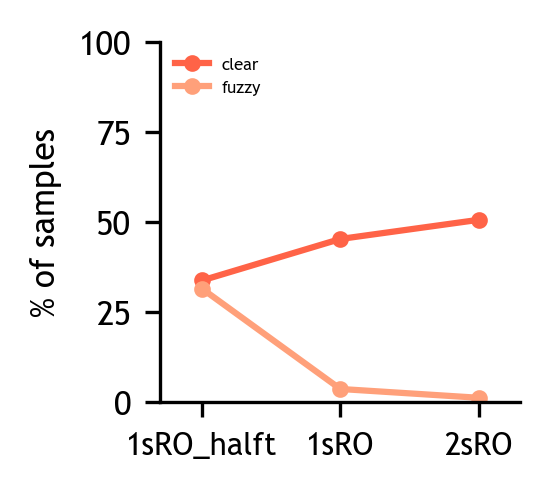

In [30]:
# 1) Plot - % of samples with clear/ fuzzy/ .. sideways
color_sideways_set1 = [color_sideways_clear, color_sideways_fuzzy, color_sideways_band, color_sideways_unsure]

# also omit fuzzy by light band & usnure sideways?
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
for idx, i in enumerate(['clear', 'fuzzy']):
    ax.plot(d[i]/d['total n']*100, '.-', color = color_sideways_set1[idx])

ax.set_ylim([0, 100])
ax.set_xlim([0-margin_3groups, 2+margin_3groups])
ax.set_ylabel('% of samples')
ax.set_xticks(np.arange(len(d.index)))
ax.set_xticklabels(d.index, fontsize = font_default-0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_box_aspect(boxAsepct_3groups)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.legend(d.columns, fontsize = font_legend, frameon = False, loc = 'upper left')
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'sideways_boundaryType_newFilter_samplePer.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'sideways_boundaryType_newFilter_samplePer.svg'), bbox_inches = 'tight')


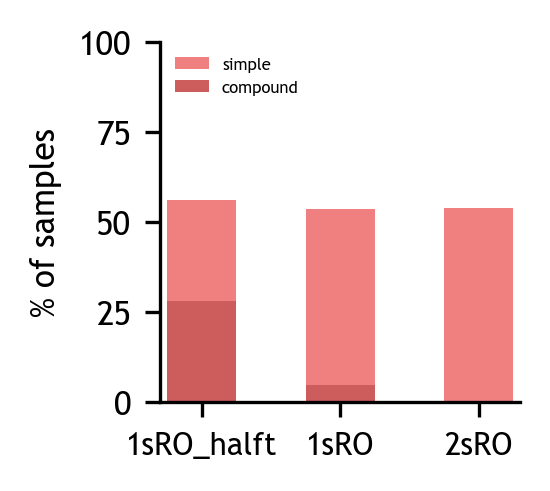

In [31]:
# 2) plot - % of samples with compound/ simple sideways vs PallottoHT, Pallotto, Hua
#note: either compound or simple, adds up to 100%
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
barTop = d2['simple sideways']/d['total n']*100
barBottom = d2['compound sideways']/d['total n']*100
ax.bar(d2.index, barTop, barWidth, label = 'simple', color = color_sideways_simple, bottom = barBottom)
ax.bar(d2.index, barBottom, barWidth, label = 'compound', color = color_sideways_compound)

ax.set_ylim([0, 100])
ax.set_xlim([0-margin_3groups, 2+margin_3groups])
ax.set_ylabel('% of samples')
ax.set_xticks(np.arange(len(d2.index)))
ax.set_xticklabels(d2.index, fontsize = font_default-0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_box_aspect(boxAsepct_3groups)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout()

leg = ax.legend(['simple', 'compound'], fontsize = font_legend, loc = 'upper left', frameon = False)
leg.get_frame().set_linewidth(lineWidth_legend)

plt.savefig(os.path.join(plotDir, 'sideways_simpleCompound_newFilter_samplePer.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'sideways_simpleCompound_newFilter_samplePer.svg'), bbox_inches = 'tight')

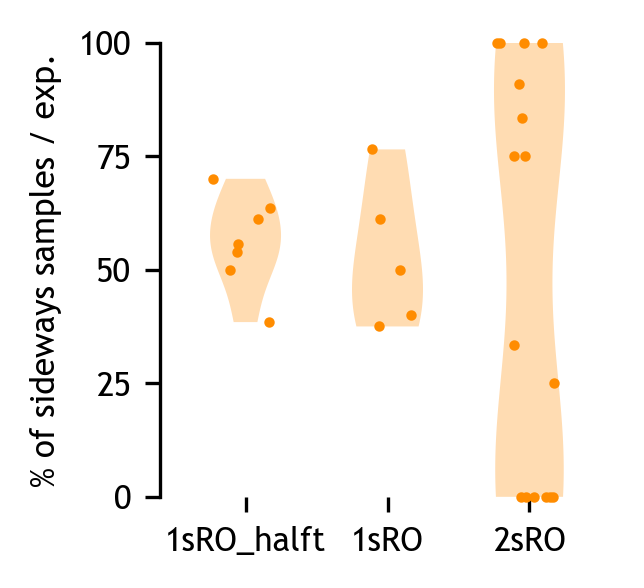

In [32]:
# 3) plot -  % of samples affected in one batch
fig, ax = plt.subplots(figsize = [plotW/1.8, plotH/2])
n = 0
for key, value in samplesAffected.items():
    x = np.tile(n, (len(value[1])))
    jx = mf.add_jitter(x, jFactor=0.1, randomSeed=1)
    ax.plot(jx, value[1], '.', color = color_sideways, markersize = dotSize_small, clip_on = False)
    n = n+1

violin_parts = ax.violinplot([samplesAffected['1sRO_halft'][1], samplesAffected['1sRO'][1], samplesAffected['2sRO'][1]], [0, 1, 2], 
                             showmeans=False, showextrema = False, vert = True)
for pc in violin_parts['bodies']:
    pc.set_facecolor(color_sideways)
    pc.set_edgecolor('none')

ax.set_ylim([0, 100])
ax.set_xlim([0-margin_3groups*2, 2+margin_3groups*2])
ax.set_ylabel('% of sideways samples / exp.')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(d2.index, fontsize = font_default)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_box_aspect(boxAsepct_3groups)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'sideways_samplesAffected_newFilter_noXaxis.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'sideways_samplesAffected_newFilter_noXaxis.svg'), bbox_inches = 'tight')


In [26]:
samplesAffected['1sRO_halft'][0].sort()
samplesAffected['1sRO'][0].sort()
samplesAffected['2sRO'][0].sort()
samplesAffected

{'1sRO_halft': [['CLEM170613',
   'CLEM170809',
   'CLEM170925',
   'CLEM171009',
   'CLEM171127',
   'CLEM180122',
   'CLEM180205'],
  [38.46153846153847,
   61.111111111111114,
   70.0,
   53.84615384615385,
   50.0,
   63.63636363636363,
   55.55555555555556]],
 '1sRO': [['CLEM180611',
   'CLEM180625',
   'CLEM180709',
   'CLEM181126',
   'CLEM181203'],
  [50.0, 76.47058823529412, 40.0, 37.5, 61.111111111111114]],
 '2sRO': [['CLEM210308_1',
   'CLEM210308_2',
   'CLEM210719',
   'CLEM210810',
   'PIP200921_1',
   'PIP200921_2',
   'PIP201014',
   'PIP210824',
   'PIP210913_1',
   'PIP210913_2',
   'PIP211019_1',
   'PIP211019_2',
   'PIP211019_3',
   'PIP211019_4',
   'PIP211019_5',
   'PIP211019_6'],
  [100.0,
   100.0,
   100.0,
   75.0,
   25.0,
   100.0,
   90.9090909090909,
   0.0,
   0.0,
   0.0,
   33.33333333333333,
   0.0,
   83.33333333333334,
   75.0,
   0.0,
   0.0]]}

In [33]:
# Plot - central vs tissue thickness
# note: Select batches where I tested different sizes because central may be protocol specific, if I only tested one thickness in a protocol, then central may occur in other sizes but I do not know.
# So batches where I tested at least 0.6mm & 1mm.
# Include: PIP200113, PIP200909, PIP200921_1 and _2 & PIP201014
# exclude discarded samples

# 0) data
thicknessToInclude = [0.4, 0.6, 1]
sampleID_forCentral, _ = mf.get_sampleID_by_filter(allInfo, {'batch': ['PIP200113', 'PIP200909', 'PIP200921', 'PIP201014'], 'thickness_mm': thicknessToInclude})
sampleID_discard, _ = mf.get_sampleID_by_filter(allInfo, {'discard': 1})
sampleID_forCentral = [i for i in sampleID_forCentral if i not in sampleID_discard]
tCentral = sampleInfo.loc[sampleID_forCentral, ['thickness_mm', 'group']].join(scoreInfo['central'])
groupN = len(tCentral['group'].unique())
l = np.zeros([groupN , len(thicknessToInclude)])
ln = np.zeros([groupN , len(thicknessToInclude)]) # sample n


for idxi, i in enumerate(tCentral['group'].unique()):
    sampleID = tCentral.index[tCentral['group'] == i]
    subT = tCentral.loc[sampleID]
    for idxj, j in enumerate(thicknessToInclude):
        n = sum(subT['thickness_mm'] == j)
        ln[idxi, idxj] = n
        l[idxi, idxj] = subT['central'][subT['thickness_mm'] == j].sum()/n * 100


tCentral_byGroup_byThickness_per = pd.DataFrame(l, index = tCentral['group'].unique(), columns = thicknessToInclude)
tCentral_byGroup_byThickness_n = pd.DataFrame(ln, index = tCentral['group'].unique(), columns = thicknessToInclude)

# get SEM (standard error of mean) for each thickness
lerr = []
for idx, i in enumerate(thicknessToInclude):
    y = tCentral_byGroup_byThickness_per[i]
    lerr.append(np.std(y) / np.sqrt(np.size(y)))

<ipython-input-33-8678e3ba50de>:24: RuntimeWarning: invalid value encountered in longlong_scalars
  l[idxi, idxj] = subT['central'][subT['thickness_mm'] == j].sum()/n * 100
<ipython-input-33-8678e3ba50de>:24: RuntimeWarning: invalid value encountered in longlong_scalars
  l[idxi, idxj] = subT['central'][subT['thickness_mm'] == j].sum()/n * 100
<ipython-input-33-8678e3ba50de>:24: RuntimeWarning: invalid value encountered in longlong_scalars
  l[idxi, idxj] = subT['central'][subT['thickness_mm'] == j].sum()/n * 100


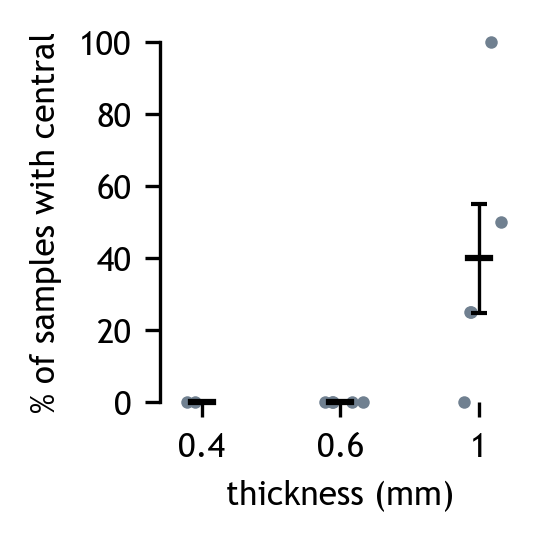

In [34]:
# 1) plot: average with error bar, overlay with individual data points
avg_bar_size = 0.08
color_avg = [0, 0, 0]
color_errorBar = [0, 0, 0]
lineWidth_erroBar = 0.8

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
x = [0, 1, 2]
# add datapoints with x jitter
for idx, i in enumerate(thicknessToInclude):
    y = tCentral_byGroup_byThickness_per[i]
    x_j = mf.add_jitter(np.tile(x[idx], len(y)), jFactor=0.1)
    ax.plot(x_j, y, '.', markerfacecolor = color_default, markeredgecolor = 'none', clip_on = False)

# plot avg value
for idx, i in enumerate(thicknessToInclude):
    y = tCentral_byGroup_byThickness_per[i].mean()
    ax.plot([x[idx]-avg_bar_size, x[idx]+avg_bar_size], [y, y], '-', color = color_avg, clip_on = False)

# add error bar
yavg = tCentral_byGroup_byThickness_per.mean()
ax.errorbar(x, yavg, yerr=lerr, fmt='none', color = color_errorBar, elinewidth = lineWidth_erroBar, capsize=2)


ax.set_ylim([0, 100])
ax.set_xlim([0-margin_3groups, 2+margin_3groups])
ax.set_ylabel('% of samples with central')
ax.set_xticks(x)
ax.set_xticklabels(thicknessToInclude)
ax.set_xlabel('thickness (mm)')
ax.set_box_aspect(1)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'central_vs_thickness_categorical.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'central_vs_thickness_categorical.svg'), bbox_inches = 'tight')

In [35]:
# Plot - Patchy
# note: pick comparable groups:
# Immersion: PIP200921_2, CLEM210308_2, CLEM210719, CLEM210810, PIP210824, PIP210913_1, PIP210913_2; Perfusion: PIP200921_1, PIP201014, CLEM210308_1
# note: exclude discard samples

# 0) data
sampleID_forPatchy_per, _ = mf.get_sampleID_by_filter(allInfo, {'group': ['PIP200921_1', 'PIP201014', 'CLEM210308_1']})
sampleID_forPatchy_imm, _ = mf.get_sampleID_by_filter(allInfo, {'group': ['PIP200921_2', 'CLEM210308_2', 'CLEM210719', 'CLEM210810', 'PIP210824', 'PIP210913_1', 'PIP210913_2']})
sampleID_discard, _ = mf.get_sampleID_by_filter(allInfo, {'discard': 1})

sampleID_forPatchy_per = [i for i in sampleID_forPatchy_per if i not in sampleID_discard]
sampleID_forPatchy_imm = [i for i in sampleID_forPatchy_imm if i not in sampleID_discard]

dImm = allInfo.loc[sampleID_forPatchy_imm, ['patchy', 'group']]
dImm.sort_index(inplace = True)

dPer = allInfo.loc[sampleID_forPatchy_per, ['patchy', 'group']]
dPer.sort_index(inplace = True)

lImm = []
for i in set(dImm['group']):
    idx = dImm['group'] == i
    n = sum(dImm['patchy'][idx] == 1)
    lImm.append(n/sum(idx)*100)

lPer = []
for i in set(dPer['group']):
    idx = dPer['group'] == i
    n = sum(dPer['patchy'][idx] == 1)
    lPer.append(n/sum(idx)*100)

# get SEM
immSEM = np.std(lImm) / np.sqrt(np.size(lImm))
perSEM = np.std(lPer) / np.sqrt(np.size(lPer))

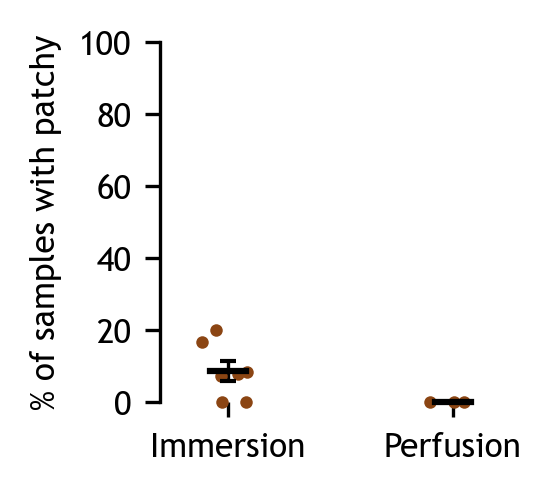

In [36]:
# 1) plot - pathcy: individual datapoint, avg and error bar
avg_bar_size = 0.08
color_avg = [0, 0, 0]
color_errorBar = [0, 0, 0]
lineWidth_erroBar = 0.8

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
# add individual plot
ax.plot(mf.add_jitter(np.tile(1, len(lImm)), jFactor=0.05, randomSeed=1), lImm, '.', markerfacecolor = color_patchy, markeredgecolor = 'none', clip_on = False)
ax.plot(mf.add_jitter(np.tile(2, len(lPer)), jFactor=0.1, randomSeed=4), lPer, '.', markerfacecolor = color_patchy, markeredgecolor = 'none', clip_on = False)

# plot average with error bar for immersion then perfusion
ax.plot([1-avg_bar_size, 1+avg_bar_size], [np.mean(lImm), np.mean(lImm)], '-', color = color_avg, clip_on = False)
ax.plot([2-avg_bar_size, 2+avg_bar_size], [np.mean(lPer), np.mean(lPer)], '-', color = color_avg, clip_on = False)
ax.errorbar(1, np.mean(lImm), yerr=immSEM, fmt='none', color = color_errorBar, elinewidth = lineWidth_erroBar, capsize=2)
ax.errorbar(2, np.mean(lPer), yerr=perSEM, fmt='none', color = color_errorBar, elinewidth = lineWidth_erroBar, capsize=2)

ax.set_xlim([1-margin_2groups, 2+margin_2groups])
ax.set_ylim([0, 100])
ax.set_ylabel('% of samples with patchy')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Immersion', 'Perfusion']) # , rotation = 30, fontsize = 4
ax.set_box_aspect(1)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'patchy_immersion_vs_perfusion_newFilter_v3.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'patchy_immersion_vs_perfusion_newFilter_v3.svg'), bbox_inches = 'tight')

<ipython-input-38-e648f96140a8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(crackNtable.index)


24 crack samples are crackI only, 81 crackII only, 16 both. Total number of crack sample is 121.


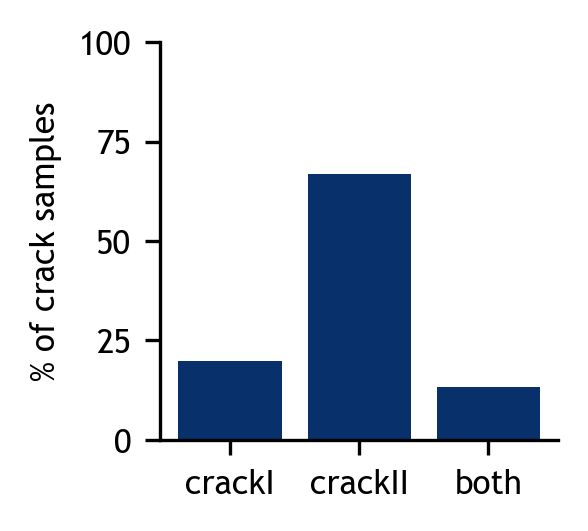

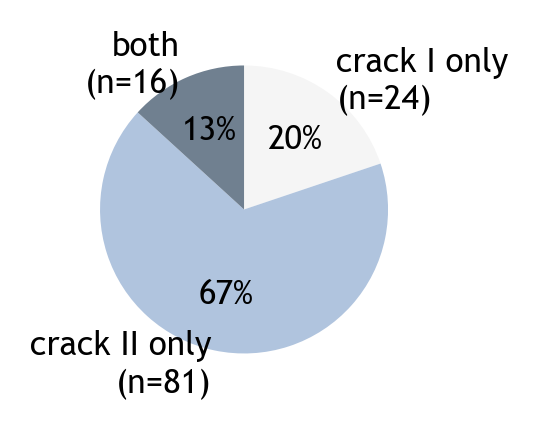

In [38]:
# Plot - crack I vs crack II occurrence
# note: include all samples, no exlcusion
crackN = scoreInfo['crack'].sum()
crack1onlyN = sum(crackSubdiv.loc[crackSubdiv.index[crackSubdiv['type I'] == 1], 'type II'] == 0)
crack2onlyN = sum(crackSubdiv.loc[crackSubdiv.index[crackSubdiv['type II'] == 1], 'type I'] == 0)
crackBothN = sum(crackSubdiv.loc[crackSubdiv.index[crackSubdiv['type I'] == 1], 'type II'] == 1)
crackNtable = pd.DataFrame([crack1onlyN/crackN*100, crack2onlyN/crackN*100, crackBothN/crackN*100], index = ['crackI', 'crackII', 'both'], columns=['% of crack samples'])

# separate bar plot
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
ax.bar(crackNtable.index, crackNtable['% of crack samples'], color = color_crack)
ax.set_ylabel('% of crack samples')
ax.set_xticklabels(crackNtable.index)
ax.set_ylim([0, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_box_aspect(1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()

#plt.savefig(os.path.join(plotDir, 'crack_subdivision_occurrence.png'), bbox_inches = 'tight')
#plt.savefig(os.path.join(plotDir, 'crack_subdivision_occurrence.svg'), bbox_inches = 'tight')
print(f'{crack1onlyN} crack samples are crackI only, {crack2onlyN} crackII only, {crackBothN} both. Total number of crack sample is {crackN}.')

# pie plot
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
pie_labels = [f'crack I only\n(n={crack1onlyN})', f'crack II only\n(n={crack2onlyN})', f'both\n(n={crackBothN})']
ax.pie(crackNtable['% of crack samples'], colors = color_pie3, startangle=90, counterclock = False, autopct='%1.0f%%', labels = pie_labels, textprops={'fontsize': font_default});

plt.savefig(os.path.join(plotDir, 'crack_subdivision_occurrence_pie_v2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crack_subdivision_occurrence_pie_v2.svg'), bbox_inches = 'tight')



<ipython-input-41-73ff3efcee0f>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(crack2_position_per.index)


there are [50, 37, 57] samples with crack II occuring at ['GL-EPL', 'MCL', 'GCL'] respectively, total crack II sample n is 97
there are [63, 21, 13] samples with crack II occuring at ['1 place', '2 places', '3 places'] respectively


<ipython-input-41-73ff3efcee0f>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(crack2_position_count.index, fontsize = font_default-1.5)


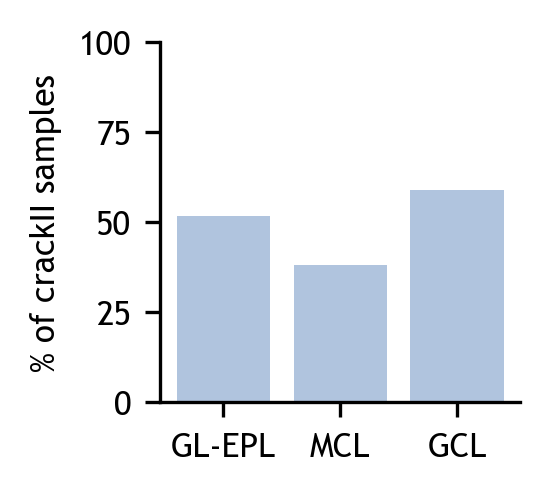

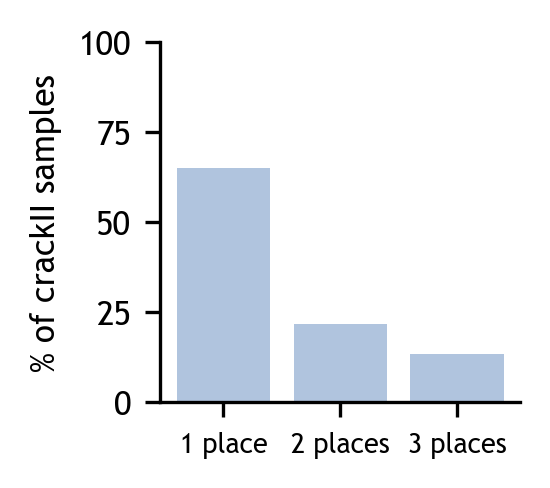

In [41]:
# Plot - crack II occurrence positions & co-occurrence
# note: include all crack II samples, no exlcusion
crack2_position_decoder = {'b': 'GL-EPL', 'c': 'MCL', 'd': 'GCL'}
ln = []
l = []
crackIIallN = crackSubdiv['type II'].sum()
crackIInotes = crackSubdiv['type II notes'][crackSubdiv['type II'] == 1]
crackIInotes_concat = '_'.join(crackIInotes[:])
for key in crack2_position_decoder.keys():
    ln.append(crackIInotes_concat.count(key))
    l.append(crackIInotes_concat.count(key)/crackIIallN*100)

crack2_position_per = pd.DataFrame(l, index = crack2_position_decoder.values(), columns = ['% of crackII samples'])

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
ax.bar(crack2_position_per.index, crack2_position_per['% of crackII samples'], color = color_crack2)
ax.set_ylim([0, 70])
ax.set_ylabel('% of crackII samples')
ax.set_xticklabels(crack2_position_per.index)
ax.set_ylim([0, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_box_aspect(1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'crackII_position_occurrence_v2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crackII_position_occurrence_v2.svg'), bbox_inches = 'tight')

print(f'there are {ln} samples with crack II occuring at {crack2_position_per.index.to_list()} respectively, total crack II sample n is {crackIIallN}')

# 2) co-occrence
idx = crackSubdiv.index[crackSubdiv['type II'] == 1]
l = [len(i) for i in crackSubdiv['type II notes'][idx]]
crack2_position_count = pd.DataFrame([l.count(1)/crackIIallN*100, l.count(2)/crackIIallN*100, l.count(3)/crackIIallN*100], index = ['1 place', '2 places', '3 places'], columns=['% of crackII samples'])
ln = [l.count(1), l.count(2), l.count(3)]

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
ax.bar(crack2_position_count.index, crack2_position_count['% of crackII samples'], color = color_crack2)
ax.set_ylim([0, 70])
ax.set_ylabel('% of crackII samples')
ax.set_xticklabels(crack2_position_count.index, fontsize = font_default-1.5)
ax.set_ylim([0, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_box_aspect(1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout()

#plt.savefig(os.path.join(plotDir, 'crackII_position_co-occurrence.png'), bbox_inches = 'tight')
#plt.savefig(os.path.join(plotDir, 'crackII_position_co-occurrence.svg'), bbox_inches = 'tight')

print(f'there are {ln} samples with crack II occuring at {crack2_position_count.index.to_list()} respectively')


In [42]:
# Plot - sample volume by group
# note: every Y group sampled, each group with at least 2 samples; Pallotto-halfTime & Pallotto sampled as well but not every C batch
# note include slab 1 only for comparison

# 0) common data
volInfo = sampleVolume.join(allInfo[['group', 'slab_idx', 'date']])
volInfo_1stSlab = volInfo.drop(index = volInfo.index[(volInfo['slab_idx'] == 'L2') | (volInfo['slab_idx'] == 'R2')])
volInfo_2ndSlab = volInfo.drop(index = volInfo.index[(volInfo['slab_idx'] == 'L1') | (volInfo['slab_idx'] == 'R1')])

# calculate average volume by group
# for 1st slabs
l = []
ldate = []
for i in volInfo_1stSlab['group'].unique():
    idx = volInfo_1stSlab['group'] == i
    n = sum(idx)
    l.append(volInfo_1stSlab['volmm3'][idx].mean())
    d = volInfo_1stSlab['date'][idx]
    ldate.append(d[0])

volAvg_1stSlab = pd.DataFrame(data={'avg vol mm3': l, 'date': ldate}, index = volInfo_1stSlab['group'].unique())
volAvg_1stSlab.index.name = 'group'
volAvg_1stSlab.sort_values(by=['date', 'group'], inplace=True, ascending = [True, True])

# for 2nd slabs
l2 = []
for i in volInfo_2ndSlab['group'].unique():
    idx = volInfo_2ndSlab['group'] == i
    n = sum(idx)
    l2.append(volInfo_2ndSlab['volmm3'][idx].mean())

volAvg_2ndSlab = pd.DataFrame(l2, columns = ['avg vol mm3'], index = volInfo_2ndSlab['group'].unique())


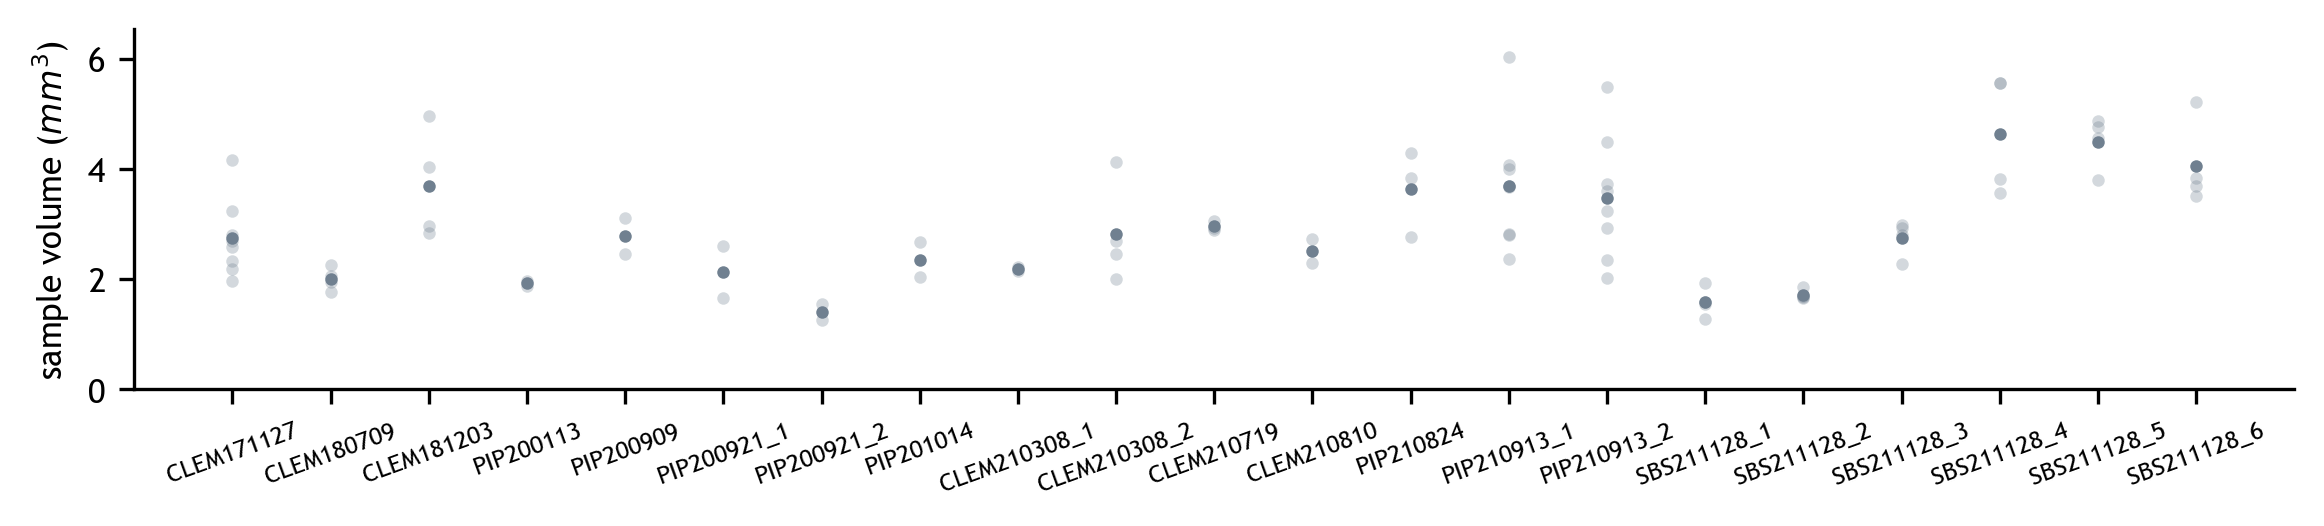

In [43]:
# 1) plot all volume sampled by group
fig, ax = plt.subplots(figsize = [plotW*3, plotH/2])
for idx, i in enumerate(volAvg_1stSlab.index):
    y = volInfo_1stSlab['volmm3'][volInfo_1stSlab['group'] == i]
    x = np.tile(idx, len(y))
    ax.plot(x, y, '.', markeredgecolor = 'none', markerfacecolor = color_default, alpha = alpha_individual)
    # add mean
    ax.plot(idx, volAvg_1stSlab.loc[i, 'avg vol mm3'], '.', markeredgecolor = 'none', markerfacecolor = color_default, alpha = alpha_avg)

ax.set_ylim([0, volInfo_1stSlab['volmm3'].max(axis = 0)+0.5])
ax.set_ylabel('sample volume ($mm^3$)')
ax.set_xticks(np.arange(len(volAvg_1stSlab.index)));
ax.set_xticklabels(volAvg_1stSlab.index, rotation = 20, fontsize = font_busyLabel);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout() # better without here

#plt.savefig(os.path.join(plotDir, 'sampleVol_by_group.png'), bbox_inches = 'tight')
#plt.savefig(os.path.join(plotDir, 'sampleVol_by_group.svg'), bbox_inches = 'tight')

In [44]:
# Plot - SBS sample volume change
# note: include estimated inVivo volume (if sample volume measured, use that, if not, use average volume of all samples measured from the same group)
# note: separate 1st & 2nd slab into 2 plots
# note: remember to cube EM2P ratio for volume (**3)!

EM2Pratio.rename(columns = {'C525a': 'C525'}, inplace=True)

#1) Estimate in vivo volume (for groups where both CT volume & EM2P ratio are known)
EM2P_sampleID = EM2Pratio.columns
EM2P_groupID = allInfo.loc[EM2P_sampleID, 'group']
EM2PratioAvg = EM2Pratio.mean(axis = 0)

# a. which samples have volume measured
useSampleVol = EM2P_sampleID.intersection(volInfo.index)
useGroupAvg = EM2P_sampleID.difference(volInfo.index)

# i. to use sample vol:
lfreshVol = []
for i in useSampleVol:
    ctVol = volInfo.loc[i, 'volmm3']
    volRatio = EM2PratioAvg[i]**3
    lfreshVol.append(ctVol/volRatio)

freshVol_bySample = pd.DataFrame(lfreshVol, index = useSampleVol, columns = ['estimated fresh vol mm3'])
replaceName = [freshVol_bySample.index[idx] for idx, _ in enumerate(freshVol_bySample.index)]
freshVol_bySample_groupIndex = pd.DataFrame(freshVol_bySample['estimated fresh vol mm3'], index = replaceName)

# ii. to use group vol:
l = []
for i in EM2P_groupID.unique():
    sampleID = EM2P_groupID.index[EM2P_groupID == i]
    l.append(np.mean(EM2PratioAvg[sampleID]))
EM2Pratio_byGroup = pd.DataFrame(l, columns = ['EM to 2P ratio'], index = EM2P_groupID.unique())

freshVol_groupID = EM2Pratio_byGroup.index.intersection(useGroupAvg)

l = []
for i in freshVol_groupID:
    volRatio = EM2Pratio_byGroup.loc[i, 'EM to 2P ratio']**3
    l.append(volAvg_1stSlab.loc[i, 'avg vol mm3']/volRatio)
freshVol_byGroup = pd.DataFrame(l, columns = ['estimated fresh vol mm3'], index = freshVol_groupID)

# b. concatanet together:
freshVol_bySampleGroup = freshVol_bySample_groupIndex.append(freshVol_byGroup)


The average sample volume for ['fresh', 'O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL'] are [1.6739820688403642, 1.5834958536173551, 1.718180086001895, 2.7470982796319046, 4.629693457127825, 4.497723599930198, 4.064950898826995]


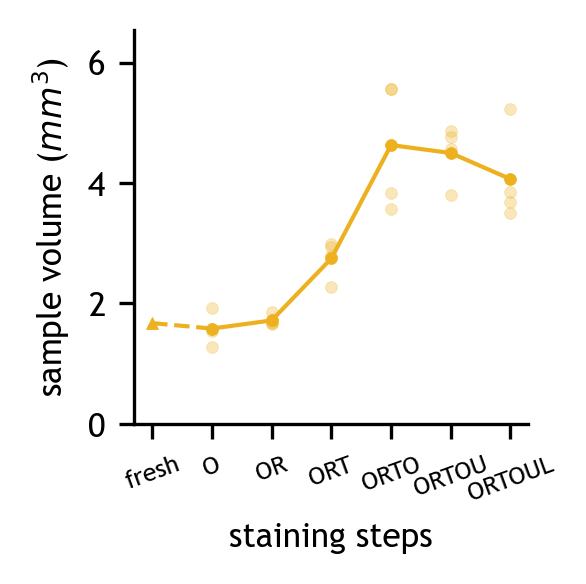

In [45]:
# 2) plot SBS volume
sbsID = volInfo_1stSlab.index[volInfo_1stSlab['group'].str.contains('SBS')]
volInfo_1stSlab_SBS = volInfo_1stSlab.loc[sbsID, ['volmm3', 'group']]

markerSize_dot = 8
marker_edgeWidth = 0.2
lineWidth_default = 1

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
# i. add estimated 2P volume
volAvg_stainingSteps = []
for i in freshVol_bySampleGroup['estimated fresh vol mm3']:
    ax.scatter(-1, i, markerSize_dot, marker='^', color=color_slab1, linewidth=marker_edgeWidth, alpha = alpha_individual)
freshVol_avg = freshVol_bySampleGroup['estimated fresh vol mm3'].mean(axis = 0)
ax.scatter(-1, freshVol_avg, markerSize_dot, marker='^', color=color_slab1, linewidth=marker_edgeWidth, alpha = alpha_avg)
volAvg_stainingSteps.append(freshVol_avg)

# ii. add SBS volumes
for idx, i in enumerate(volInfo_1stSlab_SBS['group'].unique()):
    sampleID = volInfo_1stSlab_SBS.index[volInfo_1stSlab_SBS['group'] == i]
    y = volInfo_1stSlab_SBS.loc[sampleID, 'volmm3']
    x = np.tile(idx, len(y))
    ax.scatter(x, y, markerSize_dot, marker='o', color=color_slab1, linewidth=marker_edgeWidth, alpha = alpha_individual)
    yavg = volAvg_1stSlab.loc[i, 'avg vol mm3']#
    volAvg_stainingSteps.append(yavg)
    ax.scatter(idx, yavg, markerSize_dot, marker='o', color=color_slab1, linewidth=marker_edgeWidth, alpha = alpha_avg)

# iii. add solid line between SBS groups
xall = np.arange(-1, 6)
xSBS = xall[1:]
ax.plot(xSBS, volAvg_stainingSteps[1:], '-', color=color_slab1, linewidth = lineWidth_default, alpha = alpha_avg)
# add dashed lines between fresh and SBS
xFresh = xall[0:2]
ax.plot(xFresh, volAvg_stainingSteps[0:2], '--', color=color_slab1, linewidth = lineWidth_default, alpha = alpha_avg)

xlabelNames = ['fresh', 'O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL']
ax.set_ylim([0, volInfo_1stSlab['volmm3'].max(axis = 0)+0.5])
ax.set_ylabel('sample volume ($mm^3$)')
ax.set_xlabel('staining steps')
ax.set_xticks(xall);
ax.set_xticklabels(xlabelNames, fontsize = font_busyLabel, rotation = 20);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_box_aspect(1)
plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'sampleVol_through_staining.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'sampleVol_through_staining.svg'), bbox_inches = 'tight')

print(f'The average sample volume for {xlabelNames} are {volAvg_stainingSteps}')

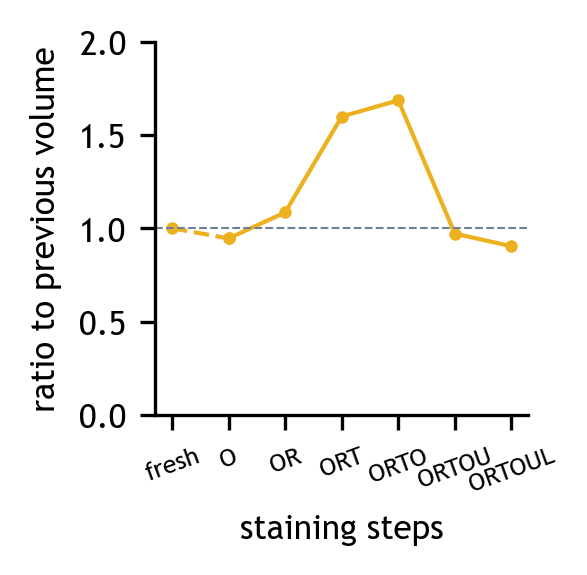

In [46]:
# 3) Plot - SBS volume ratio
volRatio_stainingSteps = [volAvg_stainingSteps[idx+1]/ volAvg_stainingSteps[idx] for idx in np.arange(len(volAvg_stainingSteps)-1)]
volRatio_stainingSteps.insert(0, 1)

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
# add point & solid line between SBS
ax.plot(np.arange(1, 7), volRatio_stainingSteps[1:], '.', markerfacecolor = color_slab1, markeredgecolor = 'none', linewidth = lineWidth_default, alpha = alpha_avg)
ax.plot(np.arange(1, 7), volRatio_stainingSteps[1:], '-', color = color_slab1, linewidth = lineWidth_default, alpha = alpha_avg)
# add dashed line between fresh & SBS
ax.plot(np.arange(0, 2), volRatio_stainingSteps[0:2], '.', markerfacecolor = color_slab1, markeredgecolor = 'none', linewidth = lineWidth_default, alpha = alpha_avg)
ax.plot(np.arange(0, 2), volRatio_stainingSteps[0:2], '--', color = color_slab1, linewidth = lineWidth_default, alpha = alpha_avg)
ax.axhline(y = 1, linestyle = '--', color = color_default, linewidth = lineWidth_legend)

ax.set_ylim([0, 2])
ax.set_ylabel('ratio to previous volume')
ax.set_xlabel('staining steps')
ax.set_xticks(np.arange(7));
ax.set_xticklabels(['fresh', 'O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL'], fontsize = font_busyLabel, rotation = 20);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_box_aspect(1)
plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'sampleVolRatio_through_staining.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'sampleVolRatio_through_staining.svg'), bbox_inches = 'tight')


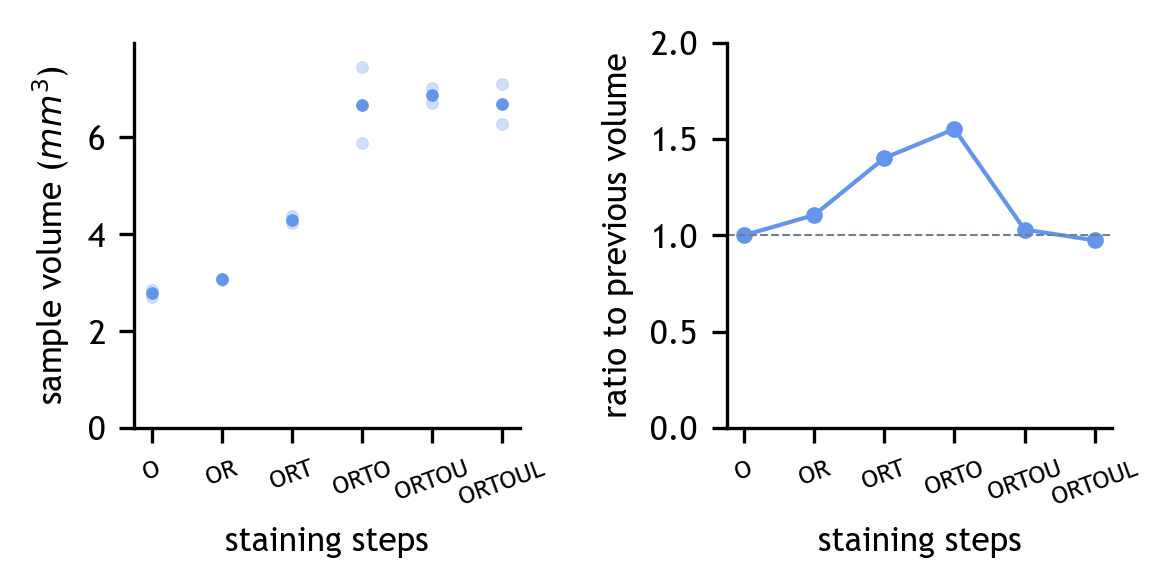

In [51]:
# 4) Plot - volume change & ratio through staining for 2nd slabs
fig, ax = plt.subplots(1, 2, figsize = [plotW, plotH/2])
volAvg_stainingSteps_slab2 = []
# volume change
for idx, i in enumerate(volInfo_2ndSlab['group'].unique()):
    sampleID = volInfo_2ndSlab.index[volInfo_2ndSlab['group'] == i]
    y = volInfo_2ndSlab.loc[sampleID, 'volmm3']
    x = np.tile(idx, len(y))
    ax[0].scatter(x, y, markerSize_dot, marker='o', color=color_slab2, linewidth=marker_edgeWidth, alpha = alpha_individual)
    yavg = volAvg_2ndSlab.loc[i, 'avg vol mm3']#
    volAvg_stainingSteps_slab2.append(yavg)
    ax[0].scatter(idx, yavg, markerSize_dot, marker='o', color=color_slab2, linewidth=marker_edgeWidth, alpha = alpha_avg)
ax[0].set_ylim([0, volInfo_2ndSlab['volmm3'].max(axis = 0)+0.5])
ax[0].set_ylabel('sample volume ($mm^3$)')
ax[0].set_xlabel('staining steps')
ax[0].set_xticks(np.arange(6));
ax[0].set_xticklabels(['O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL'], fontsize = font_busyLabel, rotation = 20);
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].set_box_aspect(1)
plt.tight_layout()

# 5) volume ratio
volRatio_stainingSteps_slab2 = [volAvg_stainingSteps_slab2[idx+1]/ volAvg_stainingSteps_slab2[idx] for idx in np.arange(len(volAvg_stainingSteps_slab2)-1)]
volRatio_stainingSteps_slab2.insert(0, 1)
ax[1].plot(np.arange(6), volRatio_stainingSteps_slab2, '.-', color = color_slab2, linewidth = lineWidth_default, alpha = alpha_avg)
ax[1].axhline(y = 1, linestyle = '--', color = color_default, linewidth = lineWidth_legend)

ax[1].set_ylim([0, 2])
ax[1].set_ylabel('ratio to previous volume')
ax[1].set_xlabel('staining steps')
ax[1].set_xticks(np.arange(6));
ax[1].set_xticklabels(['O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL'], fontsize = font_busyLabel, rotation = 20);
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].set_box_aspect(1)
plt.tight_layout()

#plt.savefig(os.path.join(plotDir, 'sampleVol_and_ratio_through_staining_2ndSlab.png'), bbox_inches = 'tight')
#plt.savefig(os.path.join(plotDir, 'sampleVol_and_ratio_through_staining_2ndSlab.svg'), bbox_inches = 'tight')


sampleID
Y267    2.280990
Y269    5.561277
Y275    4.866403
Y276    4.771712
Y278    4.558417
Y195    2.805245
Y207    3.235757
Y027    3.110141
Name: volmm3, dtype: float64

Using jFactor = 0.05 by default
Using jFactor = 0.05 by default
Using jFactor = 0.05 by default
Using jFactor = 0.05 by default


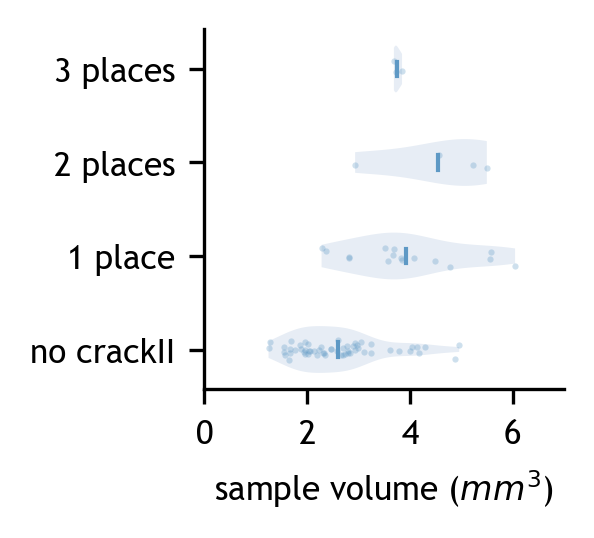

In [52]:
# Plot - crack II vs sample volume
# note: include all samples with volume data, no exclusion
# note: exclude 2nd slabs because they are larger & have a different bubble escape property

color_crack2_dark = '#5E99C5' # steel blue 2

avg_bar_size = 0.08
markerSize_violin_dot = 1

sampleVolume_1stSlab = volInfo_1stSlab['volmm3']

subT = crackSubdiv.loc[sampleVolume_1stSlab.index, 'type II notes']
l_crackII_0 = sampleVolume_1stSlab.loc[subT.isnull()]

subT_withCrackII = subT.loc[subT.index[subT.notna()]]
l_crackII_1 = sampleVolume_1stSlab.loc[[i for i in subT_withCrackII.index if len(subT_withCrackII[i]) == 1]]
l_crackII_2 = sampleVolume_1stSlab.loc[[i for i in subT_withCrackII.index if len(subT_withCrackII[i]) == 2]]
l_crackII_3 = sampleVolume_1stSlab.loc[[i for i in subT_withCrackII.index if len(subT_withCrackII[i]) == 3]]

l_cracckII = {'no crackII': l_crackII_0, '1 place': l_crackII_1, '2 places': l_crackII_2, '3 places': l_crackII_3}
l_avg = [np.mean(l_crackII_0), np.mean(l_crackII_1), np.mean(l_crackII_2), np.mean(l_crackII_3)]

# 1) dot version
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
n = 0
for key, value in l_cracckII.items():
    x = l_cracckII[key]
    y = np.tile(n, len(x))
    y_j = mf.add_jitter(y)
    ax.plot(x, y_j, '.', color = color_crack2_dark, markersize = markerSize_violin_dot, alpha = alpha_individual)
    ax.plot([l_avg[n], l_avg[n]], [n-avg_bar_size, n+avg_bar_size], '-', color = color_crack2_dark, linewidth = 1, alpha = alpha_avg)
    n = n+1
# overlay an violin plot
violin_parts = ax.violinplot([l_crackII_0, l_crackII_1, l_crackII_2, l_crackII_3], [0, 1, 2, 3], showmeans=False, showextrema = False, vert = False)
for pc in violin_parts['bodies']:
    pc.set_facecolor(color_crack2)
    pc.set_edgecolor('none')

    
ax.set_xlabel('sample volume ($mm^3$)')
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(l_cracckII.keys()) # , rotation = 30, fontsize = 4
ax.set_xlim([0, 7])
ax.set_xticks([0, 2, 4, 6])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_box_aspect(1)
#plt.tight_layout()

#plt.savefig(os.path.join(plotDir, 'crackII_vs_volume_1stSlab.png'), bbox_inches = 'tight')
#plt.savefig(os.path.join(plotDir, 'crackII_vs_volume_1stSlab.svg'), bbox_inches = 'tight')


In [54]:
# plot - boxplot of sample volume by yes or no crack

# 0) get data
crack1_id = crackSubdiv.index[crackSubdiv['type I'] == 1]
crack2_id = crackSubdiv.index[crackSubdiv['type II'] == 1]
crack_id = crack1_id.union(crack2_id)
crack_no_id = sampleInfo.index.difference(crack_id)
crack1_only_id = crack1_id.difference(crack2_id)
crack2_only_id = crack2_id.difference(crack1_id)
crack_both_id = crack1_id.intersection(crack2_id)

# which samples also have volume data
crack2_id_wVol = crack2_id.intersection(sampleVolume_1stSlab.index)
crack1_only_id_wVol = crack1_only_id.intersection(sampleVolume_1stSlab.index)
crack2_only_id_wVol = crack2_only_id.intersection(sampleVolume_1stSlab.index)
crack_both_id_wVol = crack_both_id.intersection(sampleVolume_1stSlab.index)
crack_no_id_wVol = crack_no_id.intersection(sampleVolume_1stSlab.index)
crack_id_wVol = crack_id.intersection(sampleVolume_1stSlab.index)

# get volume of these samples
crack_no_vol = sampleVolume_1stSlab[crack_no_id_wVol]
crack_vol = sampleVolume_1stSlab[crack_id_wVol]
crack1_only_vol = sampleVolume_1stSlab[crack1_only_id_wVol]
crack2_only_vol = sampleVolume_1stSlab[crack2_only_id_wVol]
crack2_vol = sampleVolume_1stSlab[crack2_id_wVol]
crack_both_vol = sampleVolume_1stSlab[crack_both_id_wVol]


Using jFactor = 0.05 by default
Using jFactor = 0.05 by default
0.0014850593527690609
Using jFactor = 0.05 by default
3.168362731821017e-08
Using jFactor = 0.05 by default
0.00797751485401827


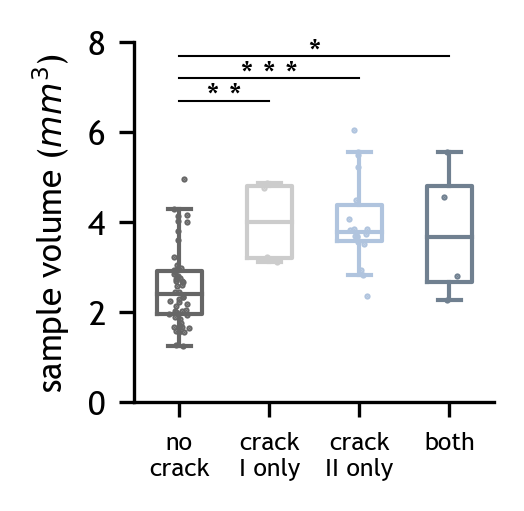

In [55]:
# 1) plot
color_box = [[0.4, 0.4,0.4], [0.8, 0.8, 0.8], color_crack2, color_crackBoth]
markerSize_box_dot = 1
width_box = 0.5
x = [1, 2, 3, 4]
y = [crack_no_vol, crack1_only_vol, crack2_only_vol, crack_both_vol]
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
for idx, i in enumerate(x):
    # settings
    medianprops = dict(color=color_box[idx])
    boxprops = dict(color=color_box[idx])
    whiskerprops = dict(color=color_box[idx])
    capprops = dict(color=color_box[idx])
    ax.boxplot(y[idx], positions=[i], notch=False, showfliers=False, widths=width_box, medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops);
    
    # add data points
    ax.plot(mf.add_jitter(np.tile(x[idx], len(y[idx]))), y[idx], '.', color=color_box[idx], markersize = markerSize_box_dot)
    
    # t-test
    if idx > 0:
        _, p = scipy.stats.ttest_ind(crack_no_vol, y[idx])
        print(p)
        # plot t-test significance
        plotPvalueX(p, ax, x[0], x[idx], 6.2+0.5*idx, hFactor=0.98)

ax.set_ylabel('sample volume ($mm^3$)')
ax.set_ylim([0, 8])
ax.set_yticks([0, 2, 4, 6, 8])
ax.set_xticks(x)
ax.set_xticklabels(['no\ncrack', 'crack\nI only', 'crack\nII only', 'both'], fontsize = font_busyLabel) # , rotation = 30, fontsize = 4

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_box_aspect(1)
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'crack_vs_volume_1stSlab_box.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crack_vs_volume_1stSlab_box.svg'), bbox_inches = 'tight')

In [56]:
# Plot - crack II vs different fixative
# note: only varied fix in Hua, choose Hua bacthes with similar volume: excluding CLEM210719, CLEM210810 (they are smaller), exlcusing SBS
# note: single PFA/GA: all groups from PIP211019
# note: PFA/GA: PIP210824, both groups from PIP210913
# note: all above are immersion fixed and no 2P samples, include all samples from theses batches
# note: CLEM210810 uses another PFA/GA mix but cannot include here
# note: exclude discard samples if any

# 0) get data
sampleID_all, _ = mf.get_sampleID_by_filter(allInfo, {'batch': ['PIP210824', 'PIP210913', 'PIP211019']})
sampleID_discard, _ = mf.get_sampleID_by_filter(allInfo, {'discard': 1})
sampleID = [i for i in sampleID_all if i not in sampleID_discard]

fixInfo = allInfo.loc[sampleID, ['group', 'fix_name', 'fixation_method', 'fix_[carrier]_M', 'fix_[GA]_percent', 'fix_[PFA]_percent']]
print('The fixation method & carrier concentration for selected bacthes are:')
print(fixInfo['fixation_method'].unique(), fixInfo['fix_[carrier]_M'].unique())

crack2vsFixTable = fixInfo.join(crackSubdiv['type II'])
crack2vsFixTable.sort_index(inplace=True)

# 2) calculate crack II % per group & display
l = []
l2 = []
for i in crack2vsFixTable['group'].unique():
    sampleID = crack2vsFixTable.index[crack2vsFixTable['group'] == i]
    crack2N = crack2vsFixTable.loc[sampleID, 'type II'].sum()
    totalN = len(sampleID)
    l.append(crack2N/totalN*100)
    l2.append(i)

crack2per_byGroup = pd.DataFrame(l, index = l2, columns = ['% of samples with crackII'])
display(crack2per_byGroup)
display(batchInfo.loc[crack2per_byGroup.index, ['fix_[GA]_percent', 'fix_[PFA]_percent']])

# 3) average by fix type

lga = []
GAbyPFAmatrix = np.zeros([4, 4])
for idxi, ga in enumerate(sorted(crack2vsFixTable['fix_[GA]_percent'].unique(), reverse=True)):
    lga.append(ga)
    lpfa = []
    for idxj, pfa in enumerate(sorted(crack2vsFixTable['fix_[PFA]_percent'].unique())):
        lpfa.append(pfa)
        d = crack2vsFixTable['type II'][(crack2vsFixTable['fix_[GA]_percent'] == ga) & (crack2vsFixTable['fix_[PFA]_percent'] == pfa)]
        crack2N = d.sum()
        totalN = len(d)
        GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100

GAbyPFAtable = pd.DataFrame(GAbyPFAmatrix, index = lga, columns = lpfa)        



The fixation method & carrier concentration for selected bacthes are:
['immersion'] [0.08]


,% of samples with crackII
PIP210824,83.333333
PIP210913_1,76.923077
PIP210913_2,61.538462
PIP211019_1,100.000000
PIP211019_2,40.000000
PIP211019_3,40.000000
PIP211019_4,100.000000
PIP211019_5,100.000000
PIP211019_6,100.000000


,fix_[GA]_percent,fix_[PFA]_percent
PIP210824,1.25,2.5
PIP210913_1,1.25,2.5
PIP210913_2,1.25,2.5
PIP211019_1,0.50,0.0
PIP211019_2,1.25,0.0
PIP211019_3,2.00,0.0
PIP211019_4,0.00,1.0
PIP211019_5,0.00,2.5
PIP211019_6,0.00,4.0


<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100
<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100
<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100
<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100
<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100
<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi, idxj] = crack2N/totalN*100
<ipython-input-56-b2ad5d925894>:47: RuntimeWarning: invalid value encountered in longlong_scalars
  GAbyPFAmatrix[idxi

[0.0, 1.0, 2.5, 4.0] [2.0, 1.25, 0.5, 0.0]


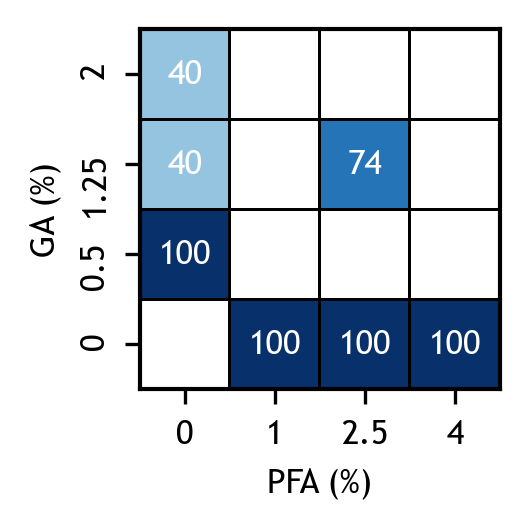

In [57]:
#1) plot heatmap
lineWidth_heatmap_frame = 0.5
color_heatmap_frame = [0, 0, 0] #[0.5, 0.5, 0.5]
color_heatmap_text = [1, 1, 1]

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
h = sns.heatmap(GAbyPFAtable, ax=ax, cmap='Blues', vmin = 0, vmax = 100, 
                annot = False, square = True, linewidths=lineWidth_heatmap_frame, linecolor=color_heatmap_frame, 
                cbar=False, cbar_kws={"shrink": .8},
                xticklabels=['0', '1', '2.5', '4'], yticklabels=['2', '1.25', '0.5', '0'])
print(lpfa, lga)
# add frame
for _, spine in h.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(lineWidth_heatmap_frame*2)
    spine.set_color(color_heatmap_frame)
# add values
for idxx, x in enumerate(GAbyPFAtable.columns.to_list()):
    for idxy, y in enumerate(GAbyPFAtable.index.to_list()):
        if ~np.isnan(GAbyPFAmatrix[idxx, idxy]):
            ax.text(idxy+0.5, idxx+0.5, round(GAbyPFAmatrix[idxx, idxy]), color = color_heatmap_text, horizontalalignment='center', verticalalignment='center')
        
ax.set_xlabel('PFA (%)')
ax.set_ylabel('GA (%)')

plt.savefig(os.path.join(plotDir, 'crackII_vs_fixConcentration_largeVolSamples_heatmap_newFilter.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crackII_vs_fixConcentration_largeVolSamples_heatmap_newFilter.svg'), bbox_inches = 'tight')


In [58]:
# numerical - get occurrence for crack I and crack II for every group
# note: Including all samples, not discarding any because not trying to make a correlation with a variable, just seeing general trends
l = []
l1 = []
l2 = []
t = crackSubdiv[['type I', 'type II']].join(allInfo['group'])
t = t.join(scoreInfo['crack'])
for i in t['group'].unique():
    idx = t['group'] == i
    crackN = t['crack'][idx].sum()
    crack1N = t['type I'][idx].sum()
    crack2N = t['type II'][idx].sum()
    totalN = sum(idx)
    l.append(round(crackN/totalN*100))
    l1.append(round(crack1N/totalN*100))
    l2.append(round(crack2N/totalN*100))

crack_byGroup = pd.DataFrame(data={'any crack %': l, 'crack I %': l1, 'crack II %': l2}, index=t['group'].unique())#
display(crack_byGroup)

,any crack %,crack I %,crack II %
CLEM170613,0,0,0
CLEM170809,0,0,0
CLEM170925,0,0,0
CLEM171009,0,0,0
CLEM171127,8,0,8
CLEM180108,6,6,0
CLEM180122,6,0,6
CLEM180205,0,0,0
CLEM180611,6,0,6
CLEM180625,7,7,0


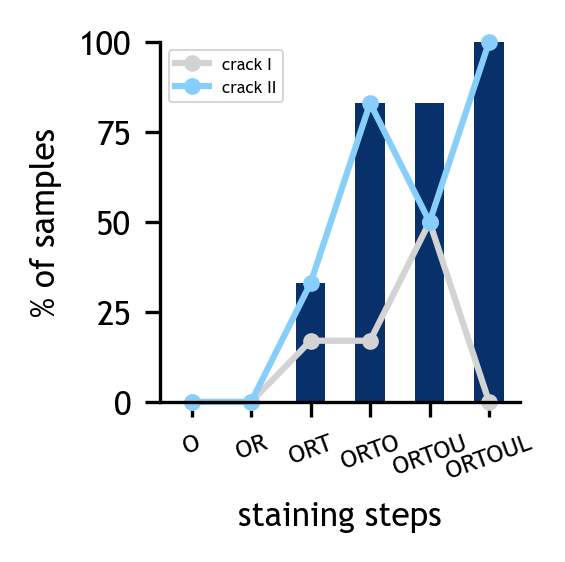

In [59]:
# Plot - crack occurrence in SBS samples
# note: include all samples from SBS (known there is no discard samples here)
# note: some samples have clear crack I that started from tissue layer, in those they are noted as 'type II extends into type I crack', manuall add them to the data
color_crack1_bright = '#D3D3D3' # silver
color_crack2_bright = '#87CEFA' # deep sky blue

idx = crack_byGroup.index.str.contains('SBS')
d = crack_byGroup.loc[crack_byGroup.index[idx], :]
labelNames = ['O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL']
x = np.arange(len(labelNames))

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
ax.bar(labelNames, d['any crack %'], barWidth, color = color_crack)
# add line plot showing crack I & crack II
ax.plot(x, d['crack I %'], '.-', color = color_crack1_bright, clip_on = False)
ax.plot(x, d['crack II %'], '.-', color = color_crack2_bright, clip_on = False)
leg = ax.legend(['crack I', 'crack II'], fontsize = font_legend)
leg.get_frame().set_linewidth(lineWidth_legend)


ax.set_ylim([0, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel('% of samples')
ax.set_xlabel('staining steps')
ax.set_xticks(np.arange(6));
ax.set_xticklabels(['O', 'OR', 'ORT', 'ORTO', 'ORTOU', 'ORTOUL'], fontsize = font_busyLabel, rotation = 20);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_box_aspect(1)
#plt.tight_layout()

plt.savefig(os.path.join(plotDir, 'SBS_crack_occurrence.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'SBS_crack_occurrence.svg'), bbox_inches = 'tight')


Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.


,crack,total n
0.6,1.0,4.0
1.0,1.0,4.0
3.0,0.0,4.0
5.0,3.0,4.0


Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.


,crack,total n
0.6,3.0,4.0
1.0,4.0,4.0
5.0,4.0,4.0


Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.


,crack,total n
0.4,2.0,8.0
0.6,2.0,8.0
1.0,2.0,8.0


Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.


,crack,total n
0.6,2.0,14.0


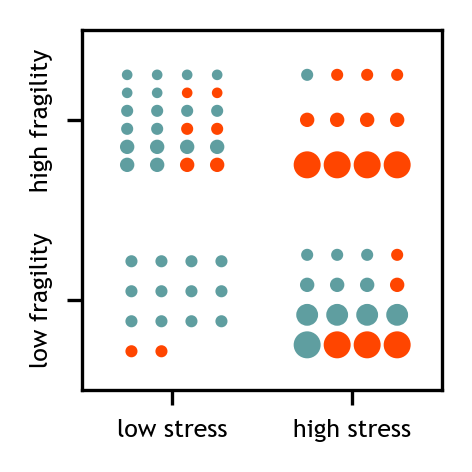

In [60]:
# Plot - Stress-fragility plot
# note: to show that TCH & fixation influences crack occurrence
# note: any crack, small samples(because known crack II occurrence influenced by sample volume) i.e. before PIP210824
# note: choose batches with different sample sizes to plot if possible
# note: stress-fragility: HL = PIP200113, HH = PIP200909, LH = PIP200921, LL = CLEM210810
# note: exclude discard samples

# 1) plot settings
dotSizeFactor = 6 # 3, 8 for full size plot
spacingFactor = 2.5 # 2.5
color_stressFragility = [np.array([95,158,160])/255, np.array([255,69,0])/255] # yellow green[154,205,50]/ cadet blue, orange red
colorMap_stressFragility = mpl.colors.ListedColormap(color_stressFragility) 


# location of each batch
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
xBottom = 0
xRange = 10
yBottom = 0
yRange = 10
ax.set_xlim([xBottom, xBottom+xRange])
ax.set_ylim([yBottom, yBottom+yRange])
xLow = xBottom+xRange*0.25
xHigh = xBottom+xRange*0.75
yLow = yBottom+yRange*0.25
yHigh = yBottom+yRange*0.75
loc = {'PIP200113': [xHigh, yLow], 'PIP200909': [xHigh, yHigh], 'PIP200921': [xLow, yHigh], 'CLEM210810': [xLow, yLow]}
rowByCol = {'PIP200113': [4, 4], 'PIP200909': [5, 4], 'PIP200921': [8, 4], 'CLEM210810': [4, 4]}
f = 0.1

for batchName, location in loc.items():
    # get data
    kp, drp = mf.get_sampleID_by_filter(allInfo, {'batch': batchName, 'discard': 0})
    d = mf.count_arte_by_feature(scoreInfo, sampleInfo, batchInfo, 'thickness_mm', arte=['crack'], exclude= drp, inPercentage=False)
    d.sort_index(inplace=True)
    display(d)
    totalN = int(d['total n'].sum())
    
    # reformat data to plotable form
    s =np.array([])
    c =np.array([])
    for idx, i in enumerate(d.index):
        n = int(d['total n'].loc[i])

        # dot size according to thickness
        sThisRow = dotSizeFactor * np.ones(n) * i
        s = np.append(s, sThisRow)

        crackN = int(d['crack'].loc[i])
        cThisRow = np.array((n-crackN)*[0] + crackN*[1])
        c = np.append(c, cThisRow)
    
    # get x, y so that all dots fit inside a square box
    x, y = mf.gridXY(rowByCol[batchName])
    x = x[0:totalN]
    y = y[0:totalN]
    x = (x-x.mean())/(x.max()-x.min())*spacingFactor
    y = (y-y.mean())/(y.max()-y.min())*spacingFactor
    
    # plot
    ax.scatter(x+location[0], y+location[1], s=s, c=c, cmap=colorMap_stressFragility)

ax.set_xticks([xLow, xHigh])
ax.set_xticklabels(['low stress', 'high stress'], fontsize = font_busyLabel)
ax.set_yticks([yLow, yHigh])
ax.set_yticklabels(['low fragility', 'high fragility'], rotation = 90, va = 'center', fontsize = font_busyLabel)
ax.set_box_aspect(1)

plt.savefig(os.path.join(plotDir, 'crack_stress_fragility_small_v2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crack_stress_fragility_small_v2.svg'), bbox_inches = 'tight')



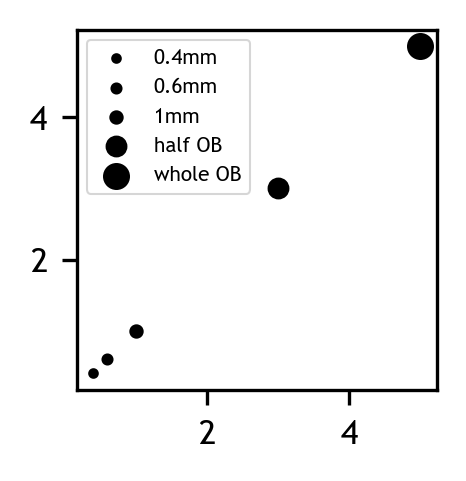

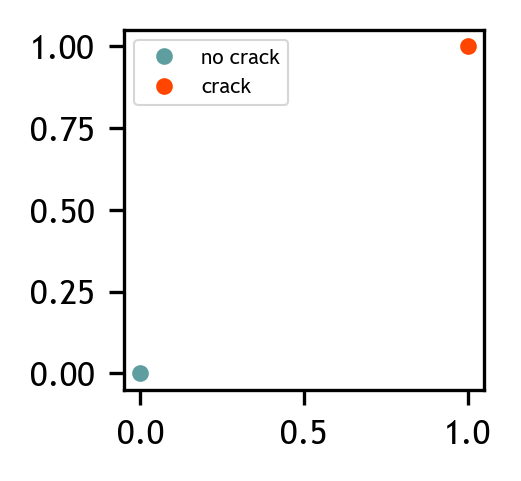

In [62]:
# 2) plot legend for stress-fragility plot
fontsize_legend = 5
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
# dotsize legend
v = [0.4, 0.6, 1, 3, 5]
vNames = ['0.4mm', '0.6mm', '1mm', 'half OB', 'whole OB']
for idx, i in enumerate(v):
    ax.scatter(i, i, s=i*dotSizeFactor, color = [0, 0, 0])
ax.set_box_aspect(1)
leg = ax.legend(vNames, fontsize = fontsize_legend)
leg.get_frame().set_linewidth(0.5)
#leg.get_frame().set_edgecolor('k')
plt.savefig(os.path.join(plotDir, 'crack_stress_fragility_legend_thickness.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crack_stress_fragility_legend_thickness.svg'), bbox_inches = 'tight')

# color legend
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
for i in range(2):
    ax.plot(i, i, '.',color = color_stressFragility[i])
ax.set_box_aspect(1)
leg = ax.legend(['no crack', 'crack'], fontsize = fontsize_legend)
leg.get_frame().set_linewidth(0.5)
#leg.get_frame().set_edgecolor('k')

plt.savefig(os.path.join(plotDir, 'crack_stress_fragility_legend_score_v2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'crack_stress_fragility_legend_score_v2.svg'), bbox_inches = 'tight')

In [28]:
group_2P

['CLEM170809',
 'CLEM170925',
 'CLEM171009',
 'CLEM171127',
 'CLEM180122',
 'CLEM180205',
 'CLEM180611',
 'CLEM180625',
 'CLEM180709',
 'CLEM181126',
 'CLEM181203',
 'CLEM210308_1',
 'CLEM210719',
 'CLEM210810']

Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (

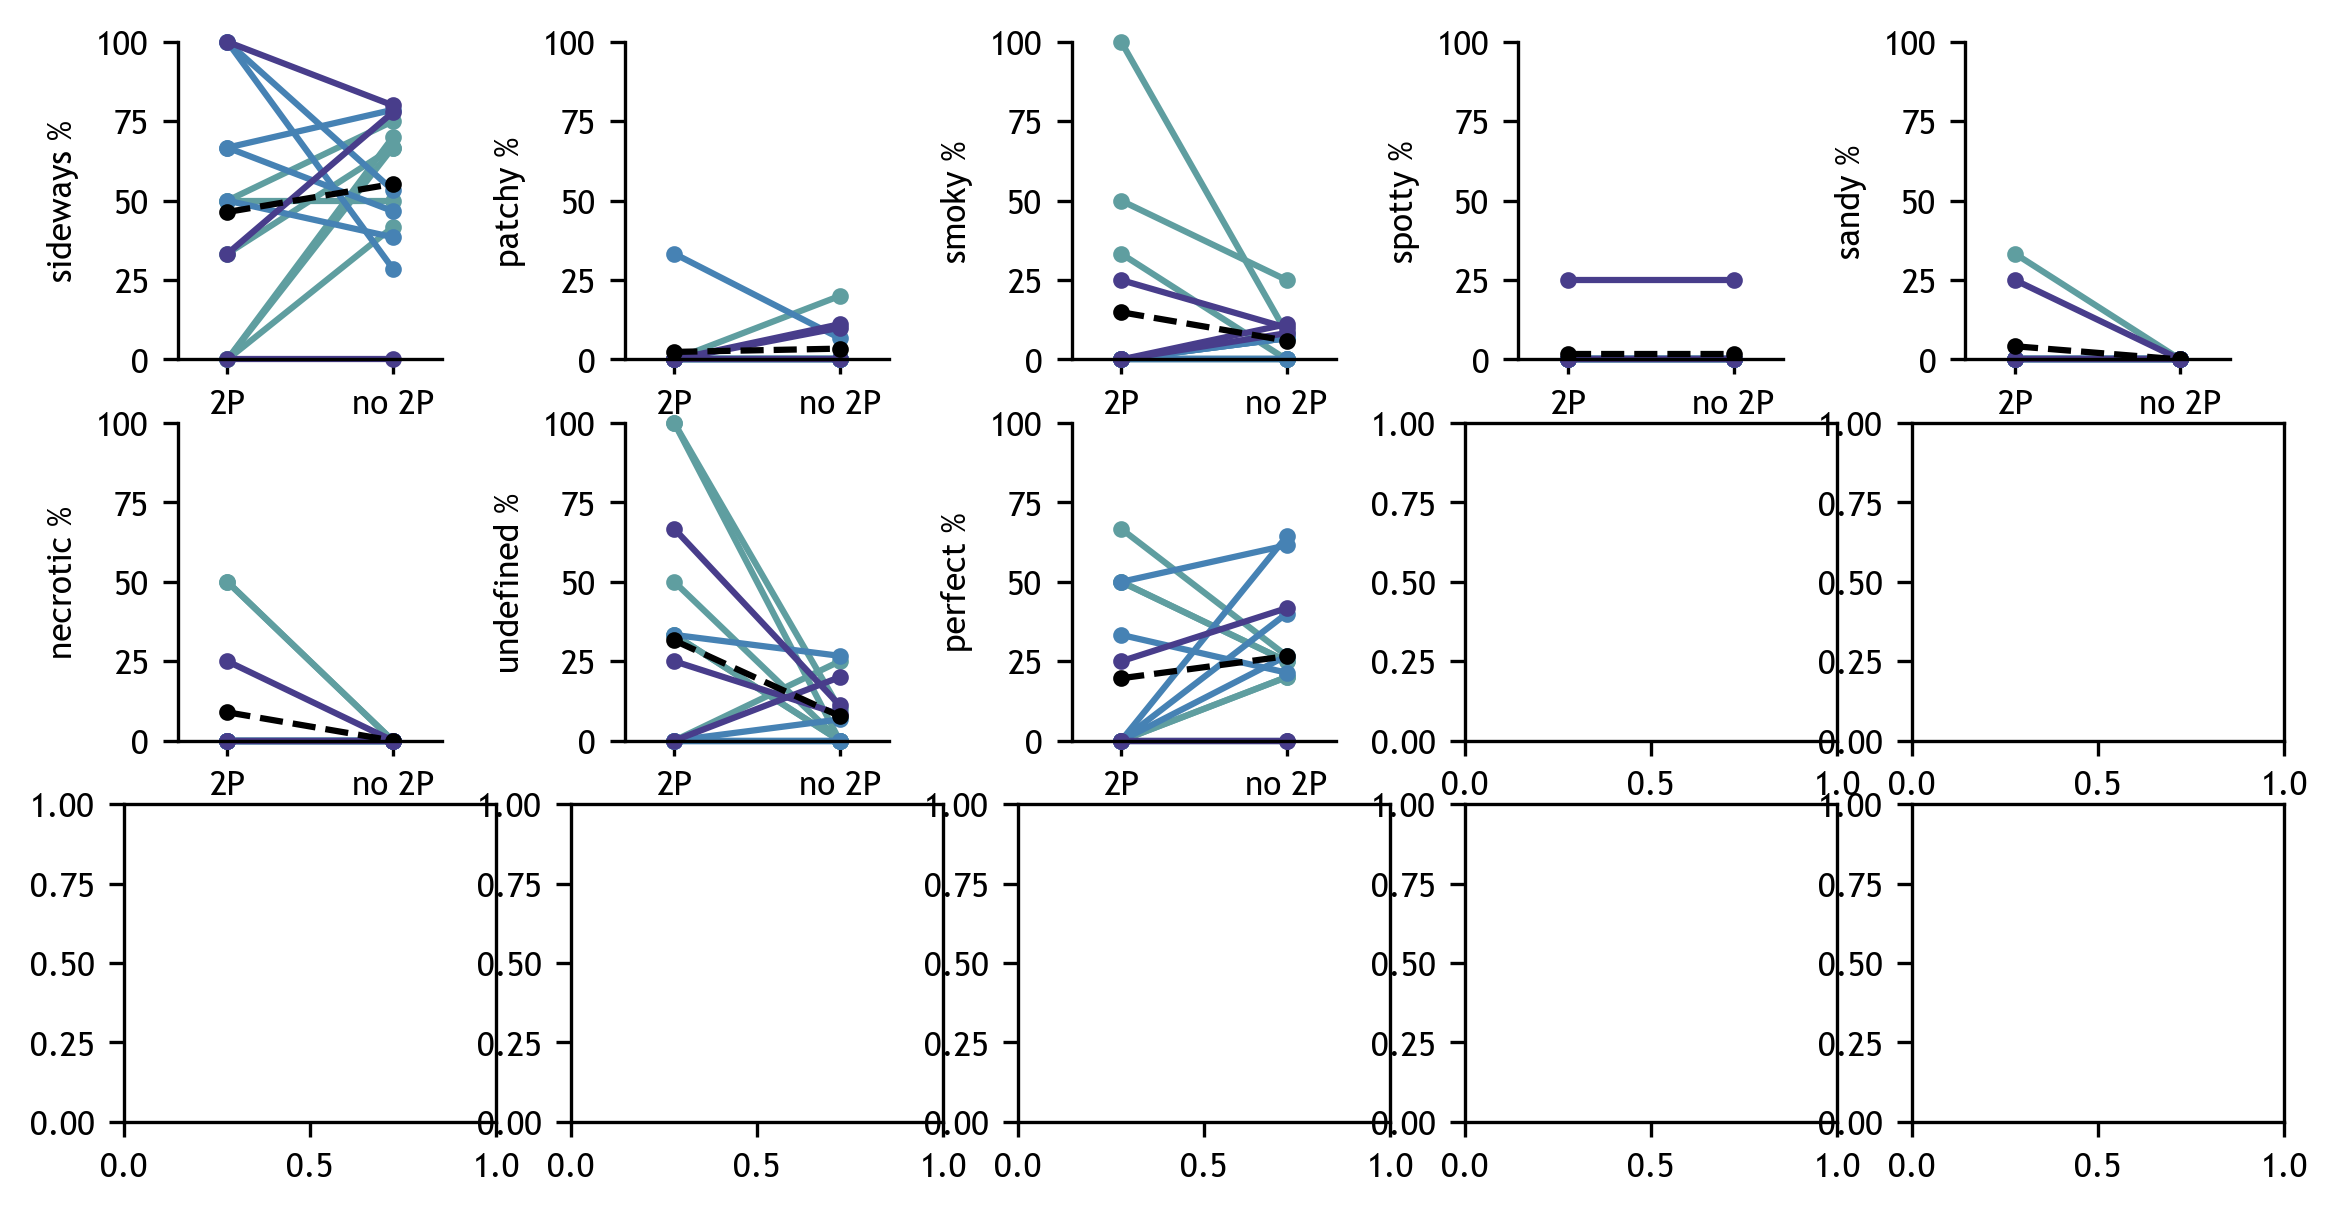

In [63]:
# Plot - 2P, normalised by non-2P for perfect
# note: include all bacthes with 2P
# note: exclude CLEM180108 (whole batch discarded, hard to type)
# note: includeing all samples from selected bacthes, no exclusion
# note: exclude discard samples
# note: only include artefacts that have a presence in 2P samples (because 2P have low n)

# 1) select samples
group_2P = batchInfo.index[batchInfo['contains_2P'] == 'T'].to_list()
group_2P.remove('CLEM180108')
kpStruc, drpStruc = mf.get_sampleID_by_filter(allInfo, {'group': group_2P, 'discard': 0, '2P_inVivo': 0})
kp2P, drp2P = mf.get_sampleID_by_filter(allInfo, {'group': group_2P, 'discard': 0, '2P_inVivo': 1})

# 2) score 'perfect'
perfectList = [0 if i > 0 else 1 for i in arteCount['no. of arte'].to_list()]
perfectTable = pd.DataFrame(perfectList, index = arteCount.index, columns = ['perfect'])
score_withPerfect = scoreInfo.join(perfectTable)


color_2PvsArte_dict = {'Pallotto+halfTime': color_PallottoHT, 'Pallotto': color_Pallotto, 'Hua':color_HuaImm}

#3) get artefact count by group for both struct and 2P samples
fig, axes = plt.subplots(3, 5, figsize = [plotW/2*6, plotH/2*3])

plotN = 0
for idx, arteName in enumerate(score_withPerfect.columns):
    tStruct = mf.count_arte_by_feature(score_withPerfect, sampleInfo, batchInfo, 'group', arte=[arteName], exclude= drpStruc, inPercentage=True)
    t2P = mf.count_arte_by_feature(score_withPerfect, sampleInfo, batchInfo, 'group', arte=[arteName], exclude= drp2P, inPercentage=True)
    
    # 4) only plot if artefact present in 2P samples - pilot plot
    if t2P[arteName].sum() > 0:
        ax = axes.ravel()[plotN]
        x = [0, 1]
        
        # i. each group as dot
        for i in t2P.index:
            y = [t2P.loc[i, arteName], tStruct.loc[i, arteName]]
            g = batchInfo.loc[i, 'stain_name']
            c = color_2PvsArte_dict[g]
            ax.plot(x, y, '.-', color = c, clip_on = False)  

        # ii. average of all groups
        ax.plot(x, [t2P[arteName].mean(), tStruct[arteName].mean()], '.--', color = [0, 0, 0])

        ax.set_xlim(x[0]-margin_2groups, x[1]+margin_2groups)
        ax.set_ylim([0, 100])
        ax.set_ylabel(arteName+' %')
        ax.set_xticks(x)
        ax.set_xticklabels(['2P', 'no 2P']) 
        ax.set_box_aspect(boxAsepct_2groups)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        
        plotN = plotN + 1

#plt.savefig(os.path.join(plotDir, '2P_vs_arte_newFilter_pilot.png'), bbox_inches = 'tight')
#plt.savefig(os.path.join(plotDir, '2P_vs_arte_newFilter_pilot.svg'), bbox_inches = 'tight')


Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
>>>perfect, 0.3649335381930603
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
>>>sideways, 0.4371234671990929
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample features by default.
Using all batch features by default.
>>>necrotic, 0.09612115801699961
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Using all sample fea

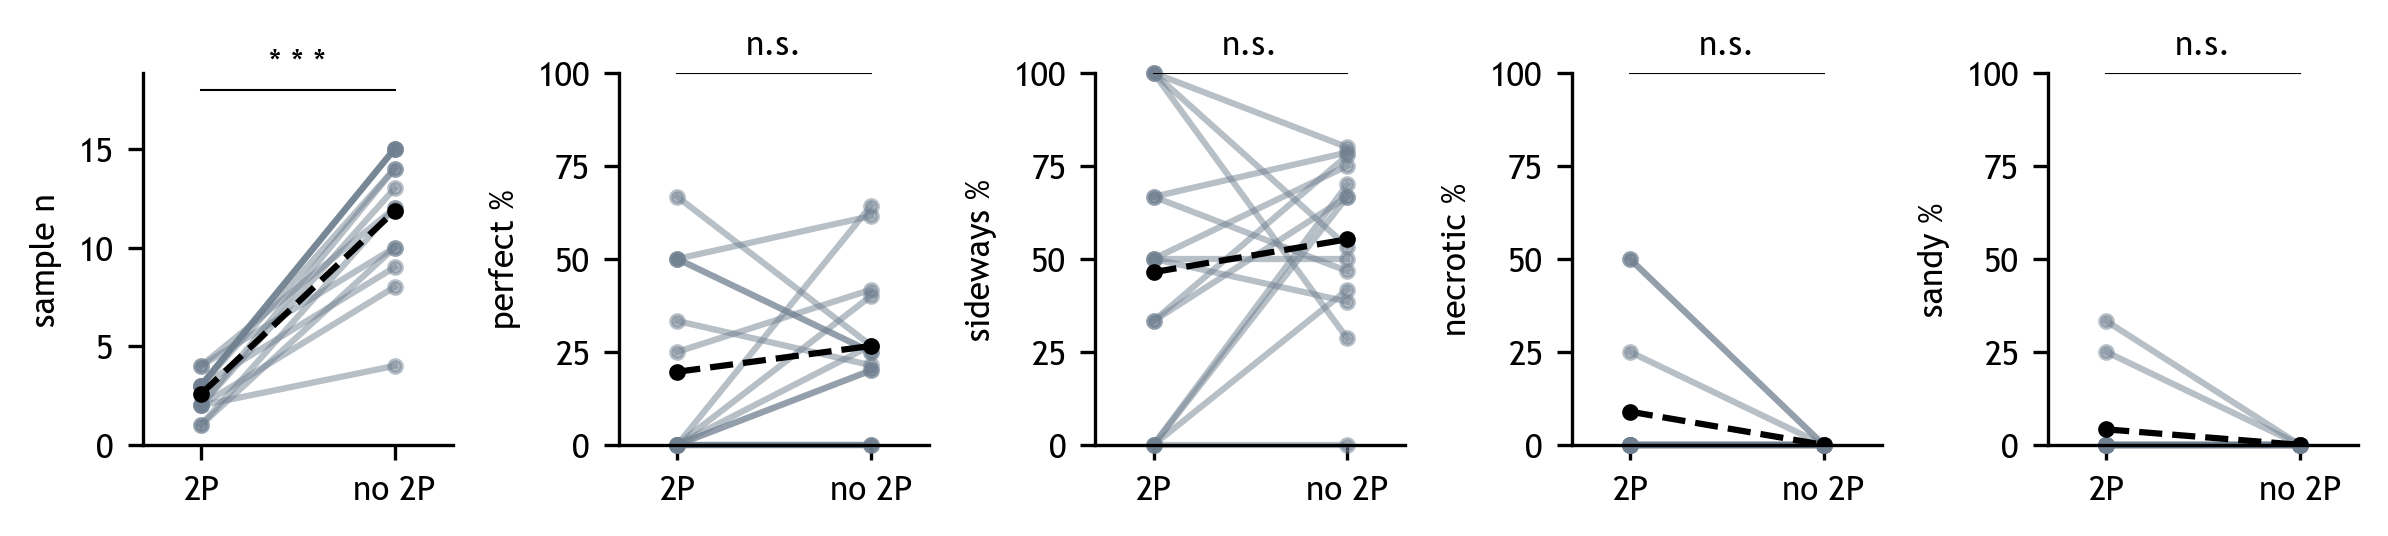

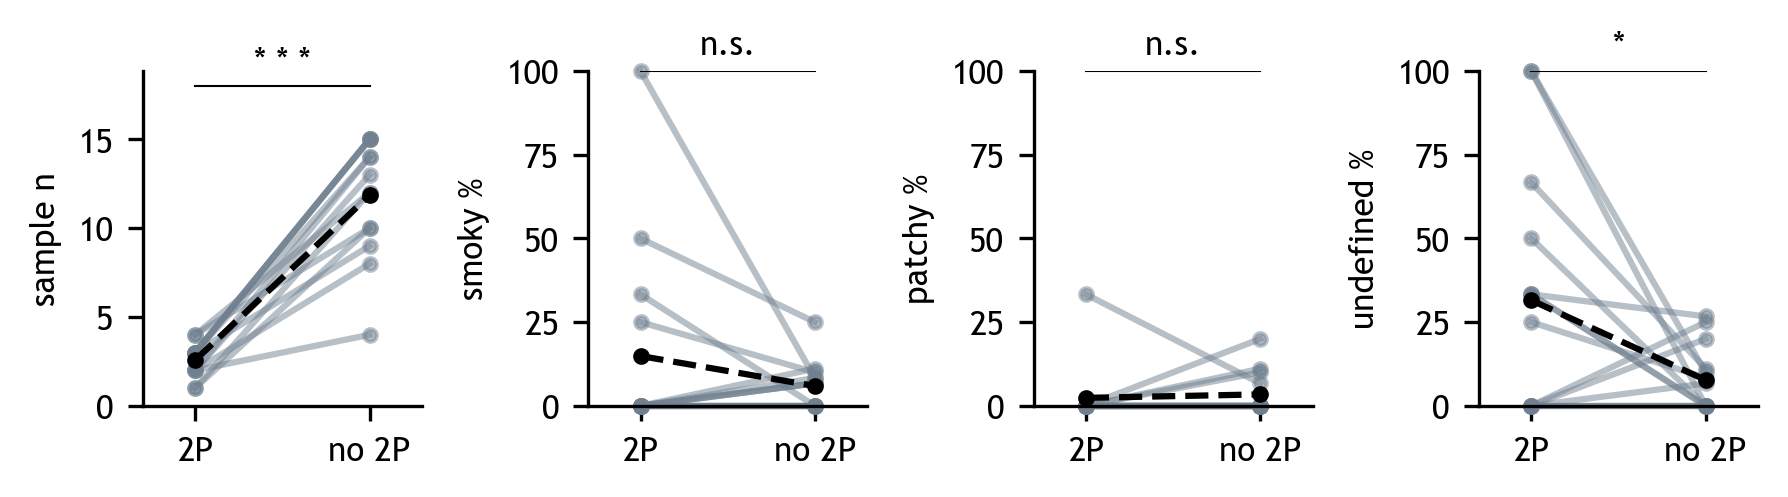

In [64]:
#4) Plot artefacts to show in main figure & in SI
# note: artefact selection criteria: perfect, common (sideways, crack), explainable (downward trend from small to large sample size) & if artefact present in 2P
# perform paired t-test
alpha_2P = alpha_individual+0.2
color_avg = [0, 0, 0]

arteDict = {'main': ['perfect', 'sideways', 'necrotic', 'sandy'], 'SI': ['smoky', 'patchy', 'undefined']}

for key, value in arteDict.items():
    plotN = len(value)
    fig, axes = plt.subplots(1, plotN+1, figsize = [plotW/2*plotN, plotH/2])
    
    for idx, arteName in enumerate(value):
        tStruct = mf.count_arte_by_feature(score_withPerfect, sampleInfo, batchInfo, 'group', arte=[arteName], exclude= drpStruc, inPercentage=True)
        t2P = mf.count_arte_by_feature(score_withPerfect, sampleInfo, batchInfo, 'group', arte=[arteName], exclude= drp2P, inPercentage=True)
        
        x = [0, 1]
        # plot artefact in ther plots
        ax = axes.ravel()[idx+1]
        
        # i. each group as dot
        for i in t2P.index:
            y = [t2P.loc[i, arteName], tStruct.loc[i, arteName]]
            ax.plot(x, y, '.-', color = color_default, alpha = alpha_2P, clip_on = False)

        # ii. average of all groups
        ax.plot(x, [t2P[arteName].mean(), tStruct[arteName].mean()], '.--', color = [0, 0, 0])

        # iii. t-test result
        _, p = scipy.stats.ttest_rel(t2P[arteName], tStruct[arteName])
        print(f'>>>{arteName}, {p}')
        plotPvalueX(p, ax, x[0], x[1], 100, hFactor=1.05)


        ax.set_xlim(x[0]-margin_2groups, x[1]+margin_2groups)
        ax.set_ylim([0, 100])
        ax.set_ylabel(arteName+' %')
        ax.set_xticks(x)
        ax.set_xticklabels(['2P', 'no 2P'])
        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_box_aspect(boxAsepct_2groups)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    # plot batch size in the 1st plot
    ax0 = axes.ravel()[0]
    ax0.plot(x, [t2P['total n'], tStruct['total n']], '.-', color = color_default, alpha = alpha_2P, clip_on = False)
    # add avergae
    ax0.plot(x, [t2P['total n'].mean(), tStruct['total n'].mean()], '.--', color = color_avg, clip_on = False)
    # t test
    _, p = scipy.stats.ttest_rel(t2P['total n'], tStruct['total n'])
    print(f'>>>sample n, {p}')
    plotPvalueX(p, ax0, x[0], x[1], 18, hFactor=1.05)
    ax0.set_ylabel('sample n')
    ax0.set_yticks([0, 5, 10, 15])
    ax0.set_xlim(x[0]-margin_2groups, x[1]+margin_2groups)
    ax0.set_xticks(x)
    ax0.set_xticklabels(['2P', 'no 2P'])
    ax0.set_box_aspect(boxAsepct_2groups)
    ax0.spines["top"].set_visible(False)
    ax0.spines["right"].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(os.path.join(plotDir, f'2P_vs_arte_newFilter_{key}_v2.png'), bbox_inches = 'tight')
    plt.savefig(os.path.join(plotDir, f'2P_vs_arte_newFilter_{key}_v2.svg'), bbox_inches = 'tight')

Including all artefacts by default
Using default True/ False threshold = 0 (T if >0, F if =< 0) 
Outputting % by default
Using all sample features by default.
Using all batch features by default.


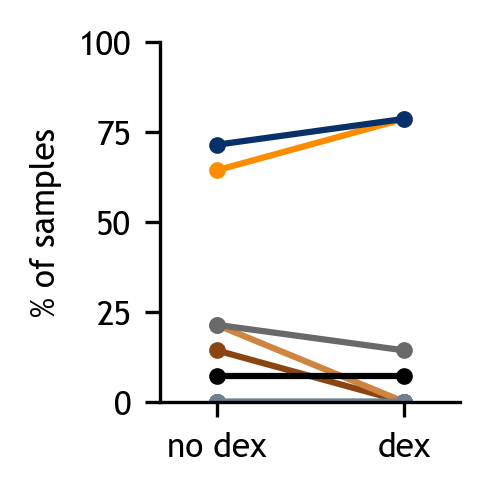

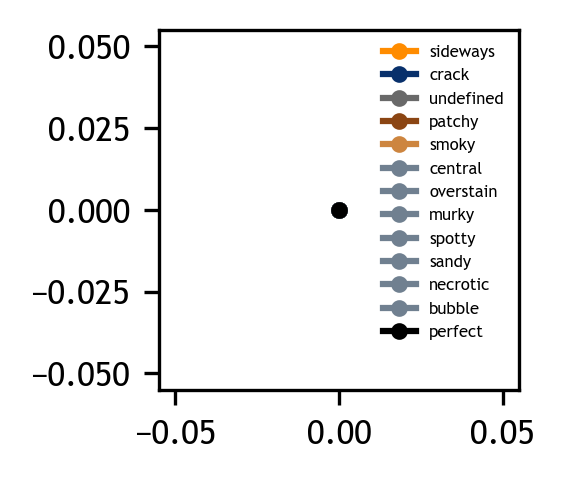

In [66]:
# Plot - dexamethasone vs all artefacts
# note: pick the batch where dex is varied within the batch: no dex: PIP210913_2; dex: PIP210913_1
color_perfect = [0, 0, 0] # dark green '#228B22' # forest green
color_allArte = {'sideways': color_sideways, 'crack': color_crack, 'undefined': color_undefined, 'patchy': color_patchy,'smoky': color_smoky, 
                 'central': color_default,'overstain': color_default, 'murky': color_default, 'spotty': color_default, 'sandy': color_default,
                 'necrotic': color_default, 'bubble': color_default, 'perfect': color_perfect}

sampleID_choose, sampleID_discard = mf.get_sampleID_by_filter(allInfo, {'batch': 'PIP210913'})
tdex_vsArte = mf.count_arte_by_feature(scoreInfo, sampleInfo, batchInfo, 'edema_dexamethasone', exclude = sampleID_discard)
tdex_perfect = perfectTable[perfectTable.index.isin(sampleID_choose)].join(allInfo['group'])
lperfect = []
for i in tdex_perfect['group'].unique():
    idx = tdex_perfect['group'] == i
    totaln = sum(idx)
    lperfect.append(tdex_perfect['perfect'][idx].sum()/totaln*100)

fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
for i in scoreInfo.columns:
    y = [tdex_vsArte.loc['F', i], tdex_vsArte.loc['T', i]]
    ax.plot([0, 1], y, '.-', color = color_allArte[i])
# add perfect %
ax.plot([0, 1], lperfect, '.-', color = color_perfect)
    
ax.set_xticks([0, 1])
ax.set_xlim(0-margin_2groups, 1+margin_2groups)
ax.set_xticklabels(['no dex', 'dex'])
ax.set_ylim([0, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel('% of samples')
ax.set_box_aspect(boxAsepct_2groups)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig(os.path.join(plotDir, 'edema_dex_vs_arte_v2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'edema_dex_vs_arte_v2.svg'), bbox_inches = 'tight')


# pot legend
fig, ax = plt.subplots(figsize = [plotW/2, plotH/2])
for i in color_allArte.keys():
    ax.plot(0, 0, '.-', color = color_allArte[i])
leg = ax.legend(color_allArte.keys(), fontsize = font_legend, frameon = False, loc = 'upper right')

plt.savefig(os.path.join(plotDir, 'edema_dex_vs_arte_legend_v2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(plotDir, 'edema_dex_vs_arte_legend_v2.svg'), bbox_inches = 'tight')
